In [ ]:
import pandas as pd
import numpy as np

## AID Data Analysis

In [ ]:
aid_data = pd.read_csv('a2019.csv',encoding='UTF-8',skipinitialspace=True)

aid_data1 = aid_data

aid_data1.columns= aid_data1.columns.str.strip()

# aid_data1 = aid_data1.dropna(subset=['c5'],how='all')

aid_data1 = aid_data1.drop(aid_data1.columns[[-1,-2]],axis=1)

fil = aid_data1['c5'].str.contains(r'^[a-zA-Z]')

aid_data1 = aid_data1[~fil]

aid_data1.reset_index(drop=True,inplace=True)

aid_data1['c9'] = pd.to_datetime(aid_data1['c9'].astype(str), format='%Y%m%d',errors='coerce')
aid_data1['c205'] = pd.to_datetime(aid_data1['c205'].astype(str), format='%Y%m%d',errors='coerce')
aid_data1['c206'] = pd.to_datetime(aid_data1['c206'].astype(str), format='%Y%m%d',errors='coerce')
aid_data1['c207'] = pd.to_datetime(aid_data1['c207'].astype(str), format='%Y%m%d',errors='coerce')
aid_data1['c208'] = pd.to_datetime(aid_data1['c208'].astype(str), format='%Y%m%d',errors='coerce')
aid_data1['c210'] = pd.to_datetime(aid_data1['c210'].astype(str), format='%Y%m%d',errors='coerce')
aid_data1['c229'] = pd.to_datetime(aid_data1['c229'].astype(str), format='%Y%m%d',errors='coerce')
aid_data1['c230'] = pd.to_datetime(aid_data1['c230'].astype(str), format='%Y%m%d',errors='coerce')
aid_data1['c10'] = pd.to_datetime(aid_data1['c10'].astype(str),format= '%H%M.0',errors='coerce').dt.strftime('%H:%M')

aid_data1[aid_data1.columns[79:95]] = aid_data1[aid_data1.columns[79:95]].fillna(0)

for col in aid_data1.columns[80:93].values:
    aid_data1[col] = aid_data1[col].astype('int64')

aid_data1[['c149','c151','c145']] = aid_data1[['c149','c151','c145']].fillna(0).astype(int).astype(str).replace('0','NaN')

aid_data1.rename(columns={'c9': 'Date_Of_Occurrence', 'c22': 'N_Number'}, inplace=True)

aid_data1 = aid_data1.add_suffix('_aid').rename(columns={'Report_Type_aid': 'Report_Type', 'Date_Of_Occurrence_aid': 'Date_Of_Occurrence','N_Number_aid':'N_Number'})

aid_data1.insert(0,'Report_Type','AID')
    
# aid_data1[aid_data1.columns[79:95]]

In [ ]:
aid_data1

,Report_Type,c5_aid,c1_aid,c2_aid,c3_aid,c4_aid,c6_aid,c7_aid,c8_aid,Date_Of_Occurrence,c10_aid,c75_aid,c132_aid,c134_aid,c136_aid,c138_aid,c139_aid,c140_aid,c141_aid,c144_aid,c145_aid,c147_aid,c149_aid,c151_aid,c152_aid,c153_aid,c155_aid,c157_aid,c160_aid,c162_aid,c203_aid,c204_aid,c214_aid,c233_aid,c234_aid,c790_aid,N_Number,c23_aid,c24_aid,c25_aid,...,c192_aid,c244_aid,c40_aid,c44_aid,c46_aid,c48_aid,c51_aid,c77_aid,c79_aid,c81_aid,c83_aid,c85_aid,c87_aid,c89_aid,c91_aid,c93_aid,c95_aid,c97_aid,c99_aid,c101_aid,c103_aid,c105_aid,c107_aid,c109_aid,c131_aid,c133_aid,c135_aid,c137_aid,c146_aid,c148_aid,c150_aid,c154_aid,c156_aid,c158_aid,c161_aid,c163_aid,c183_aid,c191_aid,c229_aid,c230_aid
0,AID,20191013023229A,A,91,NaN,NaN,2019,10,13,2019-10-13,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CV,NaN,NaN,224306,2322,NaN,NaN,NaN,NaN,96709,TAYLOR,BC12-D,NaN,...,NaN,NaN,PRIVATE PILOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Takeoff: Climb Out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wheeled-Conventional,NaN,NaN,NaN,NaN,1950-07-28,NaT
1,AID,20191122023189A,A,91,NaN,NaN,2019,11,22,2019-11-22,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1L71,1,L,7,1,3O,NaN,NaN,TR,NaN,NaN,224301,2318,NaN,NaN,NaN,NaN,969JM,CIRRUS,SR22T,NaN,...,NaN,NaN,COMM PILOT FLIGHT IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cruise/Level Flight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNDER 12501 LBS,MONOPLANE-LOW WING,POWERED,NaN,NaN,Wheeled-Tricycle,NaN,NaN,NaN,NaN,1967-07-29,NaT
2,AID,20191125023199I,I,91,NaN,NaN,2019,11,25,2019-11-25,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1L71,1,L,7,1,3O,NaN,NaN,TR,NaN,NaN,224302,2319,NaN,NaN,NaN,NaN,3201L,MOONEY,M20J,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Other, Specify",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNDER 12501 LBS,MONOPLANE-LOW WING,POWERED,NaN,NaN,Wheeled-Tricycle,NaN,NaN,NaN,NaN,1961-12-21,NaT
3,AID,20191217023209A,A,91,NaN,NaN,2019,12,17,2019-12-17,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1L71,1,L,7,1,3O,NaN,NaN,TR,NaN,NaN,224303,2320,NaN,NaN,NaN,NaN,3113V,BEECH,35R,NaN,...,NaN,NaN,COMMERCIAL PILOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taxi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNDER 12501 LBS,MONOPLANE-LOW WING,POWERED,NaN,NaN,Wheeled-Tricycle,NaN,NaN,NaN,NaN,1933-11-17,NaT
4,AID,20191218023219I,I,91,NaN,NaN,2019,12,18,2019-12-18,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TR,NaN,NaN,224304,2321,NaN,NaN,NaN,NaN,6919J,PIPER,PA-28-151,NaN,...,NaN,NaN,PRIVATE PILOT FLT IN,NaN,NaN,NaN,NaN,6111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cruise/Level Flight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wheeled-Tricycle,NaN,NaN,NaN,NaN,2000-02-19,2001-06-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,AID,20191109023169A,A,91,NaN,NaN,2019,11,9,2019-11-09,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TR,NaN,NaN,224299,2316,NaN,NaN,NaN,NaN,7703J,PIPER,PA-32-260,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Takeoff: Climb Out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wheeled-Tricycle,NaN,NaN,NaN,NaN,NaT,NaT
2387,AID,20191108023179A,A,91,NaN,NaN,2019,11,8,2019-11-08,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1H71,1,H,7,1,3O,NaN,NaN,CV,NaN,NaN,224300,2317,NaN,NaN,NaN,NaN,9925N,CESSNA,180J,NaN,...,NaN,NaN,PRIVATE PILOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Takeoff: Departure R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNDER 12501 LBS,MONOPLANE-HIGH WING/PARA WING,POWERED,NaN,NaN,Wheeled-Conventional,NaN,NaN,NaN,NaN,1967-01-14,NaT
2388,AID,20190928023159I,I,121,NaN,NaN,2019,9,28,2019-09-28,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
# aid_data1.c151_aid

In [ ]:
# aid_data1.to_csv('a2019_Clean.csv', index=False)

## SDR Data Analysis

In [ ]:
sdr_data = pd.read_csv('sdr(2019_Occurred_Incidents).csv',encoding='UTF-8',skipinitialspace=True,dtype=str)
sdr_data1 = sdr_data

sdr_data1 = sdr_data1.dropna(subset=['c25'],how='all')

sdr_data1 = sdr_data1.drop(sdr_data1.columns[[-1,-2,-3,0]],axis=1)
sdr_data1.columns= sdr_data1.columns.str.strip()

sdr_data1['c10'] = pd.to_datetime(sdr_data1['c10'].astype(str), format='%Y%m%d',errors='coerce')
sdr_data1['c25'] = pd.to_datetime(sdr_data1['c25'].astype(str), format='%Y%m%d',errors='coerce')

sdr_data1['Remarks'] = sdr_data1[['c510a','c510b','c510c','c510d','c510e','c510f']].fillna('').agg(' '.join, axis=1)

sdr_data1['Remarks']= sdr_data1['Remarks'].str.strip().str.replace('\s+', ' ', regex=True)

sdr_data1.drop(['c510a', 'c510b','c510c','c510d','c510e','c510f'], axis=1, inplace=True)

sdr_data1.rename(columns={'c25': 'Date_Of_Occurrence', 'c390': 'N_Number'}, inplace=True)

sdr_data1 = sdr_data1.add_suffix('_sdr').rename(columns={'Report_Type_sdr': 'Report_Type', 'Date_Of_Occurrence_sdr': 'Date_Of_Occurrence','N_Number_sdr':'N_Number','Remarks_sdr':'Remarks'})

sdr_data1.insert(0,'Report_Type','SDR')

sdr_data1.head(5)

,Report_Type,c10_sdr,c12_sdr,c14_sdr,c15_sdr,c16_sdr,c17_sdr,c18_sdr,c20_sdr,Date_Of_Occurrence,c35_sdr,c40_sdr,c90_sdr,c100_sdr,c110_sdr,c120_sdr,c130_sdr,c140_sdr,c150_sdr,c152_sdr,c160_sdr,c170_sdr,c180_sdr,c190_sdr,c192_sdr,c200_sdr,c210_sdr,c220_sdr,c230_sdr,c240_sdr,c250_sdr,c260_sdr,c270_sdr,c280_sdr,c290_sdr,c300_sdr,c310a_sdr,c310b_sdr,c310c_sdr,c310d_sdr,c314a_sdr,c314b_sdr,c314c_sdr,c314d_sdr,c320a_sdr,c320b_sdr,c320c_sdr,c324a_sdr,c324b_sdr,c324c_sdr,c330_sdr,c332_sdr,c340_sdr,c350_sdr,c360_sdr,c370_sdr,c380_sdr,N_Number,c400_sdr,c410_sdr,c420_sdr,c430_sdr,c440_sdr,c450_sdr,c460_sdr,c490_sdr,c602_sdr,c604_sdr,c606_sdr,c608_sdr,c610_sdr,c612_sdr,c614_sdr,c616_sdr,c620_sdr,c640_sdr,c652_sdr,c654_sdr,c660_sdr,Remarks
0,SDR,2019-09-06,NaN,NM,2019,9,6,.FDEA201904040764,1,2019-04-04,A,5320,ACA314011,FLOOR SUPPORT,NaN,NaN,DOUG,MD11,MD11F,3023600,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZONE 200,CORRODED,A,NaN,NaN,FDEA,K,NaN,NaN,NaN,NONE,NaN,NaN,NaN,O,NaN,NaN,OTHER,NaN,NaN,IN,INSP/MAINT,1,NaN,NaN,CE,23,604FE,NaN,NaN,NaN,NaN,48460,NaN,NaN,NaN,NaN,NaN,NaN,3,4F,NaN,NaN,RT,A22WE,NaN,NaN,NaN,NaN,FLOOR BOARD SUPPORT CORRODED @ STA. 6-70 CENTE...
1,SDR,2019-11-18,NaN,NE,2019,11,18,11FA2019070100001,2,2019-05-23,A,7200,NaN,ENGINE,NaN,NaN,CESSNA,510,510,2076617,CE,PWC,PW615,PW615FA,52282,NE,NaN,NaN,NaN,NaN,NR 2,MALFUNCTIONED,E,NaN,NaN,11FA,C,NaN,NaN,NaN,ABORTED TAKEOFF,NaN,NaN,NaN,M,J,NaN,OVER TEMP,WARNING INDICATION,NaN,TO,TAKEOFF,1,NaN,NaN,SW,3,820UT,NaN,NaN,NaN,NaN,5100332,LB0666,NaN,NaN,NaN,NaN,NaN,2,4F,4,F,RT,A00014WI,E00073EN,NaN,NaN,NaN,ITT SPIKE NR 2 ENGINE EXCEEDED REDLINE. ENGINE...
2,SDR,2019-11-18,NaN,CE,2019,11,18,11FA2019070100002,1,2019-05-20,A,7722,NaN,UNKNOWN,NaN,NaN,CESSNA,510,510,2076617,CE,PWC,PW615,PW615FA,52282,NE,NaN,NaN,NaN,NaN,NaN,MALFUNCTIONED,E,NaN,NaN,11FA,K,NaN,NaN,NaN,NONE,NaN,NaN,NaN,J,M,NaN,WARNING INDICATION,OVER TEMP,NaN,CL,CLIMB,1,NaN,NaN,SW,3,820UT,NaN,NaN,NaN,NaN,5100332,LB0666,NaN,NaN,NaN,NaN,NaN,2,4F,4,F,RT,A00014WI,E00073EN,NaN,NaN,NaN,ITT SPIKE IN THE CLIMB FOR UNKNOWN REASONS. MA...
3,SDR,2020-03-24,NaN,NM,2020,3,24,120B201911200001,1,2019-11-18,A,2697,5534001R16,WIRE HARNESS,KIDDE,NA,BOEING,767,767323,1385205,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT FIRE LOOP,BROKEN,I,NaN,NaN,120B,K,NaN,NaN,NaN,NONE,NaN,NaN,NaN,O,NaN,NaN,OTHER,NaN,NaN,IN,INSP/MAINT,1,NaN,NaN,GL,3,36NE,NaN,NaN,NaN,NSN,25193,NaN,NaN,NaN,NaN,NaN,NaN,2,4F,NaN,NaN,RT,A1NM,NaN,NaN,NaN,NaN,RH ENGINE FIRE LOOP 1 DISPLAYED ON EICAS ON PR...
4,SDR,2020-06-02,NaN,NM,2020,6,2,120B201912240002,1,2019-12-23,A,2841,2021207,INDICATOR,NaN,NaN,BOEING,767,767323,1385205,NM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FUEL QTY,INOPERATIVE,I,NaN,NaN,120B,H,NaN,NaN,NaN,DEACTIVATE SYST/CIRCUITS,NaN,NaN,NaN,J,NaN,NaN,WARNING INDICATION,NaN,NaN,NR,NOT REPORTED,1,NaN,NaN,GL,3,225NE,99331,16,NaN,NaN,25194,NaN,NaN,NaN,NaN,NaN,NaN,2,4F,NaN,NaN,RT,A1NM,NaN,NaN,NaN,NaN,FUEL QUANTITY SYSTEM DISPLAYED ON PREFLIGHT EI...


In [ ]:
sdr_data1['Remarks'].loc[3000]

'AIRCRAFT WAS GROUNDED: IMMEDIATELY AFTER TAKE OFF AND THOUGHT THE REMINDER OF THE CAPTAINS SIDE NAV DISPLAY AND PRIMARY FLIGHT DISPLAY WOULD JUMP. OR SHAKE LEFT AND RIGHT WHILE IN A RUN MOVEMENT WAS ABOUT 1/2 TO 1 INCH EACH DIRECTION EMANA TING FROM AIRCRAFT SYMBOL WHICH REMAINED STATIONARY, OUT TO THE HEADING BUG AND HEADING SYMBOL AS WELL AS THE TRACK LINE AND THE IMAGES THAT WERE DISPLAYED ON THE NAV MAP. ALL OTHER INDICATIONS ON THE NAV DISPLAY LIKE WX RADAR INFO RND-ANP , TRK MAG , GS GROUND SPEED, TAS RANGE WAY POINT INFOR REMAIND STATIONARY. THE LARGEST MOVEMENT WAS NOTICEABLE THE FUR THER TO THE TOP OF THE DISPLAY THINGS WERE DISPLAYED ONE IN LEVEL FLIGHT. THERE WAS STILL SLIGHT MOVEMENT OF THE MAP ON'

In [ ]:
sdr_data1.shape

(61009, 80)

In [ ]:
sdr_data1['Date_Of_Occurrence'].isnull().sum()

0

In [ ]:
# sdr_data1.to_csv('sdr2019_Clean.csv', index=False)

## E-File AID Data Analysis

In [ ]:
import more_itertools as mit

e_aid_data = pd.read_csv('e2019(possible).csv',encoding='UTF-8',skipinitialspace=True)

e_aid_data1= e_aid_data

e_aid_data1 = e_aid_data1.dropna(subset=['c5'],how='all')

e_aid_data1['remark'] = e_aid_data1[['remark','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9']].replace('?','').fillna('').agg(' '.join, axis=1)
e_aid_data1 = e_aid_data1.drop(e_aid_data1.columns[[2,3,4,5,6,7,8,9]],axis=1)

e_aid_data1.reset_index(drop=True,inplace=True)

e_aid_data1['remark']= e_aid_data1['remark'].replace(r'^\s*$', np.nan, regex=True)

e_aid_data1['remark']= e_aid_data1['remark'].mask(pd.isnull, e_aid_data1['c5'])


fill = e_aid_data1['c5'].str.contains(r'^\b2019')

e_aid_data1['c5'][fill==False] = np.nan

q=[index for index, row in e_aid_data1.iterrows() if row.isnull().any()]

q=[list(group) for group in mit.consecutive_groups(q)]

for i in q:
    t=''
    s=i[0]
    for j in i:
        t+=(e_aid_data1.iloc[j]['remark'])
        t+=' '
    e_aid_data1.iloc[s-1]['remark']+=t
        
e_aid_data1 = e_aid_data1[pd.notnull(e_aid_data1['c5'])]

e_aid_data1.reset_index(drop=True,inplace=True)

e_aid_data1.rename(columns={'c5':'c5_aid','remark': 'Remarks'},inplace=True)

e_aid_data1['Remarks'] = e_aid_data1['Remarks'].str.replace('\^PRIVACY DATA OMITTED\^', '').str.strip().str.replace('\s+', ' ', regex=True)

# e_aid_data1['Remarks'] = e_aid_data1['Remarks'].str.replace('iaw srm dwg', '').str.strip().str.replace('\s+', ' ', regex=True)

# e_aid_data1 = e_aid_data1.add_suffix('_aid')

e_aid_data1.insert(0,'Report_Type','AID')

e_aid_data1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Report_Type,c5_aid,Remarks
0,AID,20190101007219I,DURING APPROACH TO STUART WITHAM AIRPORT THE A...
1,AID,20190101007229I,THE ONLY INFORMATION PROVIDED BY AIRMAN WAS TH...
2,AID,20190101008169I,"ON DEPARTURE ROLL FROM PORT EADS GRASS STRIP, ..."
3,AID,20190101016219I,"VENICE, FL. N241EE, BE35 LANDED ON RUNWAY 23 A..."
4,AID,20190102000019A,1/2/19 AT 1045 EST. N772MG AN R44 HELICOPTER C...
...,...,...,...
2403,AID,20191231019739I,PILOT WAS IN THE TRAFFIC PATTERN FOR THE CREST...
2404,AID,20191231019749I,PILOT WAS CONDUCTING A FAR PART 91 TRIP TO MCC...
2405,AID,20191231019759A,PILOT UTILIZING PRIVATE MOWED STRIP TO PRACTIC...
2406,AID,20191231020669A,THE PILOT WITH 3 PASSENGERS INITIATED A TAKEOF...


In [ ]:
e_aid_data1['Remarks'].loc[1]

'THE ONLY INFORMATION PROVIDED BY AIRMAN WAS THAT RUNWAY 18 WAS SOFT AND THAT ON HIS TAKEOFF CLIMB THE AIRCRAFT STRUCK THE TOP OF SOME TREES.'

In [ ]:
# e_aid_data1.to_csv('e2019(possible)_Clean.csv', index=False)

In [ ]:
aid_data1 = pd.merge(aid_data1, e_aid_data1, how="outer", on=["Report_Type", "c5_aid"])

# aid_data1 = aid_data1[['Report_Type','Remarks']]

aid_data1 = aid_data1.drop('c119_aid',axis=1)

aid_data1

,Report_Type,c5_aid,c1_aid,c2_aid,c3_aid,c4_aid,c6_aid,c7_aid,c8_aid,Date_Of_Occurrence,c10_aid,c75_aid,c132_aid,c134_aid,c136_aid,c138_aid,c139_aid,c140_aid,c141_aid,c144_aid,c145_aid,c147_aid,c149_aid,c151_aid,c152_aid,c153_aid,c155_aid,c157_aid,c160_aid,c162_aid,c203_aid,c204_aid,c214_aid,c233_aid,c234_aid,c790_aid,N_Number,c23_aid,c24_aid,c25_aid,...,c244_aid,c40_aid,c44_aid,c46_aid,c48_aid,c51_aid,c77_aid,c79_aid,c81_aid,c83_aid,c85_aid,c87_aid,c89_aid,c91_aid,c93_aid,c95_aid,c97_aid,c99_aid,c101_aid,c103_aid,c105_aid,c107_aid,c109_aid,c131_aid,c133_aid,c135_aid,c137_aid,c146_aid,c148_aid,c150_aid,c154_aid,c156_aid,c158_aid,c161_aid,c163_aid,c183_aid,c191_aid,c229_aid,c230_aid,Remarks
0,AID,20191013023229A,A,91,NaN,NaN,2019.0,10.0,13.0,2019-10-13,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CV,NaN,NaN,224306.0,2322.0,NaN,NaN,NaN,NaN,96709,TAYLOR,BC12-D,NaN,...,NaN,PRIVATE PILOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Takeoff: Climb Out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wheeled-Conventional,NaN,NaN,NaN,NaN,1950-07-28,NaT,THE PILOT OBTAINED LOCAL AUTOMATED WEATHER REP...
1,AID,20191122023189A,A,91,NaN,NaN,2019.0,11.0,22.0,2019-11-22,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1L71,1,L,7,1,3O,NaN,NaN,TR,NaN,NaN,224301.0,2318.0,NaN,NaN,NaN,NaN,969JM,CIRRUS,SR22T,NaN,...,NaN,COMM PILOT FLIGHT IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cruise/Level Flight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNDER 12501 LBS,MONOPLANE-LOW WING,POWERED,NaN,NaN,Wheeled-Tricycle,NaN,NaN,NaN,NaN,1967-07-29,NaT,DEPARTED TRL FOR FLIGHT TO GLADEWATER. CLIMBED...
2,AID,20191125023199I,I,91,NaN,NaN,2019.0,11.0,25.0,2019-11-25,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1L71,1,L,7,1,3O,NaN,NaN,TR,NaN,NaN,224302.0,2319.0,NaN,NaN,NaN,NaN,3201L,MOONEY,M20J,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Other, Specify",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNDER 12501 LBS,MONOPLANE-LOW WING,POWERED,NaN,NaN,Wheeled-Tricycle,NaN,NaN,NaN,NaN,1961-12-21,NaT,"ON NOVEMBER 25, 2019, AT APPROXIMATELY 1130 EA..."
3,AID,20191217023209A,A,91,NaN,NaN,2019.0,12.0,17.0,2019-12-17,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1L71,1,L,7,1,3O,NaN,NaN,TR,NaN,NaN,224303.0,2320.0,NaN,NaN,NaN,NaN,3113V,BEECH,35R,NaN,...,NaN,COMMERCIAL PILOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taxi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNDER 12501 LBS,MONOPLANE-LOW WING,POWERED,NaN,NaN,Wheeled-Tricycle,NaN,NaN,NaN,NaN,1933-11-17,NaT,THE PILOT/OWNER WAS INTENDING TO MAKE A SHORT ...
4,AID,20191218023219I,I,91,NaN,NaN,2019.0,12.0,18.0,2019-12-18,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TR,NaN,NaN,224304.0,2321.0,NaN,NaN,NaN,NaN,6919J,PIPER,PA-28-151,NaN,...,NaN,PRIVATE PILOT FLT IN,NaN,NaN,NaN,NaN,6111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cruise/Level Flight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wheeled-Tricycle,NaN,NaN,NaN,NaN,2000-02-19,2001-06-13,A PORTION OF THE PROPELLER SEPARATED FROM AIRC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,AID,20190513016771A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,"ON MONDAY, MAY 13, 2019 AT APPROXIMATELY 1221 ..."
2404,AID,20190601016399A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
# aid_data1.to_csv('AID_a-e_file_combined.csv', index=False)

## EON Data Analysis

In [ ]:
eon_data = pd.read_csv('EON-2019(Jan-Mar).csv',encoding='UTF-8',skipinitialspace=True)
eon_data1 = eon_data
eon_data1.columns= eon_data1.columns.str.strip()

eon_data1['Event Date'] = pd.to_datetime(eon_data1['Event Date'])
eon_data1['Event Time'] = eon_data1['Event Date'].dt.strftime('%H:%M')
eon_data1['Event Date'] = eon_data1['Event Date'].dt.strftime('%Y-%m-%d')

eon_data1['Event Date'] = pd.to_datetime(eon_data1['Event Date'])

cols = eon_data1.columns.tolist()
cols = cols[0:5]+cols[-1:]+cols[5:36]
eon_data1 = eon_data1[cols]

eon_data1['Message Whole'] = eon_data1[['MessageText.1','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','Unnamed: 34','Unnamed: 35']].fillna('').agg(' '.join, axis=1)

eon_data1['Message Whole'] = eon_data1['Message Whole'].str.strip().str.replace('\s+', ' ', regex=True)

eon_data1.rename(columns={'Message Whole': 'Remarks','Event Date': 'Date_Of_Occurrence'},inplace=True)

cols1 = eon_data1.columns.tolist()
cols1 = cols1[0:29] + cols1[-1:]

eon_data1 = eon_data1[cols1]

eon_data1['N_Number'] = eon_data1['Title'].str.extract(r'((?<=\|).+?(?=\|))')

eon_data1['N_Number'] = eon_data1['N_Number'].str.strip()

fil = eon_data1['N_Number'].str.contains('^N[0-9]')

eon_data1['N_Number'][fil==True] = eon_data1['N_Number'][fil==True].apply(lambda x : x[1:] if str(x).startswith("N") else x)

eon_data1.insert(0,'Report_Type','EON')

# eon_data1.drop(['Title'], axis=1, inplace=True)

eon_data1.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,Report_Type,Id,Title,Description,Event Type,Date_Of_Occurrence,Event Time,Reported By,Received Date,Latitude,Longitude,City,State,Airport,Region,Reporting Facility,Aircraft Type,Departure,Arrival,Diverted To,POB,Injury Type,Injuries Minor,Injuries Serious,Fatalities,Injuries Unknown,Uninjured,POB Unknown,Damage Type,MessageText,Remarks,N_Number
0,EON,554891,MEDICAL EMERGENCY - PASSENGER | ASA1305 | SAN ...,NaN,MEDICAL EMERGENCY - PASSENGER,2019-01-01,02:01,NaN,NaN,37.618805,-122.375420,SAN FRANCISCO,CA,SFO,AWP,MOR/SFO @,A320,NaN,SFO,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,0,Not Reported,"SAN FRANCISCO, CA (SFO)",", A320, SFODECLARED A MEDICAL EMERGENCY FOR A ...",ASA1305
1,EON,554892,GENERAL AVIATION OCCURRENCE | N9118C | SANTA R...,NaN,GENERAL AVIATION OCCURRENCE,2019-01-01,02:38,NaN,NaN,38.509693,-122.812889,SANTA ROSA,CA,STS,AWP,MOR/STS @ 1843 PST,C182,NaN,STS,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,0,Not Reported,"SANTA ROSA, CA (STS)","C182, STSLANDED WITHOUT INCIDENT AFTER REPORTI...",9118C
2,EON,554894,GENERAL AVIATION OCCURRENCE | N613PJ | TETERBO...,NaN,GENERAL AVIATION OCCURRENCE,2019-01-01,03:15,NaN,NaN,40.850113,-74.060837,TETERBORO,NJ,TEB,AEA,TEB,CL60,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,0,Not Reported,"TETERBORO, NJ (TEB)","CL60, DIVERTED TO TEB AND LANDED WITHOUT INCID...",613PJ
3,EON,554895,"LASER EVENT | N4203P | PASCO, WA (PSC) 01-01-2...",NaN,LASER EVENT,2019-01-01,03:26,NaN,NaN,46.264694,-119.119026,PASCO,WA,PSC,ANM,MOR/PSC @ 1943 PST,C172,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,0,Not Reported,"PASCO, WA (PSC)","C172, WAS ILLUMINATED BY A GREEN LASER FROM TH...",4203P
4,EON,554908,AIR CARRIER OR TAXI OCCURRENCE | NKS8618 | DET...,NaN,AIR CARRIER OR TAXI OCCURRENCE,2019-01-01,11:25,NaN,NaN,42.212444,-83.353386,DETROIT,MI,DTW,AGL,DTW MOR,A320,DTW,DFW,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,0,Not Reported,"DETROIT, MI (DTW)",", A320, DTW-DFW, ABORTED TAKEOFF DUE TO A MALF...",NKS8618


In [ ]:
# eon_data1['N-Number'].isna().sum()

# eon_obj = eon_data1.select_dtypes('object')

# eon_obj

eon_data1['Title'].loc[1]

'GENERAL AVIATION OCCURRENCE | N9118C | SANTA ROSA, CA (STS) 01-01-2019 0238Z'

In [ ]:
# eon_data1.info()

In [ ]:
# eon_data1.to_csv('EON-2019(Jan-Mar)_Clean.csv', index=False)

## Merging Process(in Progress)

In [ ]:
merged_aid_sdr = aid_data1.append(sdr_data1,sort=False)

In [ ]:
merged_aid_sdr

In [ ]:
# merged_eon_eaid = eon_data1.append(e_aid_data1,sort=False)

In [ ]:
# merged_eon_eaid

In [ ]:
merged_total = merged_aid_sdr.append(eon_data1,sort=False)

In [ ]:
merged_total

In [ ]:
merged_total.reset_index(drop=True,inplace=True)

## Natural Language Processing

In [ ]:
aid_data1_a = aid_data1[['Report_Type','c5_aid']]

In [ ]:
aid_data1_a.shape

(2408, 2)

In [ ]:
e_aid_data1.shape

(2408, 3)

In [ ]:
aid_data1_nlp = pd.merge(aid_data1_a, e_aid_data1, how="outer", on=["Report_Type", "c5_aid"])

aid_data1_nlp = aid_data1_nlp[['Report_Type','Remarks']]

aid_data1_nlp

,Report_Type,Remarks
0,AID,THE PILOT OBTAINED LOCAL AUTOMATED WEATHER REP...
1,AID,DEPARTED TRL FOR FLIGHT TO GLADEWATER. CLIMBED...
2,AID,"ON NOVEMBER 25, 2019, AT APPROXIMATELY 1130 EA..."
3,AID,THE PILOT/OWNER WAS INTENDING TO MAKE A SHORT ...
4,AID,A PORTION OF THE PROPELLER SEPARATED FROM AIRC...
...,...,...
2403,AID,"ON MONDAY, MAY 13, 2019 AT APPROXIMATELY 1221 ..."
2404,AID,"ON JUNE 1, 2019, ABOUT 2030 CENTRAL STANDARD T..."
2405,AID,"WHILE ON APPROACH TO LANDING, N72LB, A LINSTRA..."
2406,AID,PILOT FAILED TO MAINTAIN DIRECTIONAL CONTROL O...


In [ ]:
aid_text = aid_data1_nlp['Remarks'].tolist()
aid_text

In [ ]:
# pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(aid_text)
aid_TF_IDF = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
aid_TF_IDF = aid_TF_IDF.sort_values('TF-IDF', ascending=False)
print (aid_TF_IDF.head(25))

                   TF-IDF
the              0.492444
wichita          0.199689
windsock         0.177753
pilot            0.171142
even             0.161121
winds            0.155691
indicating       0.141836
mph              0.132976
to               0.125770
airspeed         0.120865
run              0.120218
aircraft         0.116521
dwight           0.112591
eisenhower       0.112591
mushy            0.112591
mushiness        0.112591
eck              0.112591
69f              0.112591
noticed          0.103442
ict              0.102949
nne              0.102949
capability       0.102949
controllability  0.097308
sse              0.097308
decreasing       0.095164


In [ ]:
# aid_data1_nlp.Remarks[aid_data1_nlp.Remarks.str.contains('(SMOKE)|(FUMES)|(FIRE)|(ODORS)|(SPARKE)')]

In [ ]:
# aid_data1_nlp.Remarks[aid_data1_nlp.Remarks.str.contains('(BIRD STRIKE)')]

In [ ]:
# aid_data1_nlp.Remarks[aid_data1_nlp.Remarks.str.contains('(FUSELAGE)')]

In [ ]:
aid_data1_nlp.Remarks[aid_data1_nlp.Remarks.str.contains('(ENGINE FIRE)')]

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


187     ON MARCH 20, 2019 ABOUT 1506 EASTERN DAYLIGHT ...
246     PILOT/OWNER OF N90LK, RV-6, MET CFI FOR BI-ANN...
465     ON MARCH 31, 2019, AT APPROXIMATELY 1130 A.M. ...
470     THE FLYING CLUB OPERATOR REPORTED DAMAGE TO N1...
554     STUDENT PILOT CONDUCTING 3RD SOLO FLIGHT. STUD...
626     ON JUNE 21, 2019 AT APPROXIMATELY 11:29 A.M. (...
647     ON APRIL 21 AT APPROXIMATELY 1642 UTC (1242 ED...
768     AIRCRAFT WAS EMERGENCY LANDED ON 05/29/2019 AT...
772     RECEIVED NOTIFICATION OF AN AIRCRAFT INCIDENT/...
918     ON FEBRUARY 9, 2019, AT APPROXIMATELY 12.10 LO...
1095    SUBJECT AIRCRAFT STRUCK THE RUNWAY WITH THE LE...
1128    STUDENT PILOT WAS LANDING CESSNA 152, N904WA A...
1314    N3598R DEPARTED FORT SMITH REGIONAL AIRPORT (K...
1662    N64003 IS A 1975 CESSNA 172M OWNED AND OPERATE...
1688    PILOT WAS HEADING BACK TO HOME BASE ZUEHL AIRP...
2019    ON 12/19/2019, A 1981 PA-28-161, N83993, S/N 2...
2038    DAB- LANDED ON RUNWAY 7L AND THE BRAKES FAILED...
2192    ON MON

In [ ]:
# aid_data1_nlp.info()

In [ ]:
# aid_data1_nlp.to_csv('a_2019(NLP).csv', index=False)

In [ ]:
sdr_data1_nlp = sdr_data1[['Report_Type','Remarks']]

eon_data1_nlp = eon_data1[['Report_Type','Remarks']]

eon_data1_nlp.Remarks = eon_data1_nlp.Remarks.str.lstrip(',').str.strip()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
# sdr_data1_nlp.Remarks[sdr_data1_nlp.Remarks.str.contains('(BIRD STRIKE)')]

In [ ]:
# sdr_data1_nlp.Remarks[sdr_data1_nlp.Remarks.str.contains('(FUSELAGE)')]

In [ ]:
sdr_data1_nlp.Remarks[sdr_data1_nlp.Remarks.str.contains('((ENGINE FIRE))')]

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


3        RH ENGINE FIRE LOOP 1 DISPLAYED ON EICAS ON PR...
215      DURING APPROACH LT ENGINE FIRE INDICATION INTE...
222      LT ENGINE LOOP A AND FIRE HANDLE INTERMITTENT ...
232      CREW REPORTED RIGHT ENGINE FIRE LIGHT ILLUMINA...
295      #1 ENGINE FIREWALL CHAFED BY FIRE LOOP BRACKET...
                               ...                        
59895    (CAN) THE #2 ENGINE FIRE WARNING LIGHT ILLUMIN...
59931    (CAN) IT WAS REPORTED TO BELL:DURING BUCKETING...
60160    (CAN) EAGLE COPTERS IS CURRENTLY INVESTIGATING...
60681    RETURN FLIGHT KCHO TO KFCI, PILOT ENCOUNTERED ...
60788    WE WERE CLIMBING SOMEWHERE IN THE LOW 20’S. WE...
Name: Remarks, Length: 144, dtype: object

In [ ]:
(sdr_data1['c250_sdr']+' '+sdr_data1['c260_sdr']).value_counts().head(20)

FUSELAGE CORRODED                    5426
FUSELAGE CRACKED                     2613
CABIN INOPERATIVE                    1102
COCKPIT FALSE ACTIVATION              806
EMERGENCY LIGHTS INOPERATIVE          733
CABIN DISCHARGED                      603
EMERGENCY LIGHT INOPERATIVE           480
LT WING CRACKED                       478
HORIZONTAL STAB CRACKED               464
CABIN FAILED                          459
RT WING CRACKED                       453
FUSELAGE DAMAGED                      448
EMERGENCY LIGHTS NO TEST              443
CABIN ODOR                            398
RT WING CORRODED                      326
LT WING CORRODED                      310
CABIN DAMAGED                         303
CABIN BROKEN                          265
RT HORIZ STAB CRACKED                 232
COCKPIT MALFUNCTIONED                 229
dtype: int64

In [ ]:
# sdr_data1_nlp.Remarks[sdr_data1_nlp.Remarks.str.contains('(SMOKE)|(FUMES)|(FIRE)|(ODORS)|(SPARKE)')]

In [ ]:
# eon_data1_nlp.Remarks[eon_data1_nlp.Remarks.str.contains('(BIRD STRIKE)')]

In [ ]:
# eon_data1_nlp.Remarks[eon_data1_nlp.Remarks.str.contains('(FUSELAGE)')]

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


717     N125UW, A320, PHL-RDU, SUSTAINED DAMAGE WHEN A...
1218    B738, ATL-EWR, SUSTAINED DAMAGE TO A FUSELAGE ...
3035    M20, ELP-IWS, CRASHED INTO OPEN FIELD 10 E KAT...
5029    N862DA, B772, MSP-RJTT, WAS BEING DEICED PRIOR...
5175    P28A, ON RIGHT DOWNWIND RY 26R REPORTED A BIRD...
5200    N216HA, A21N, LAX-PHLI, ACFT WAS BEING PUT INT...
7356    BE55, LANDED RUNWAY 18 WITH THE LANDING GEAR R...
7855    C162, NOSE GEAR SEPARATED FROM THE AIRCRAFT WH...
7918    M20E, LANDED RUNWAY 36 WITH THE LANDING GEAR R...
8089    N777KT, C750, ON 1.5 MILE FINAL TO RUNWAY 32L,...
8417    BE35, LANDED RUNWAY 5 WITH THE LANDING GEAR RE...
8439    64DX, A321, A VEHICLE FIRE AT THE BASE OF DAL ...
9056    A320, DSM-DEN, DEPARTED AND WHEN 20 MILES WEST...
Name: Remarks, dtype: object

In [ ]:
eon_data1_nlp.Remarks[eon_data1_nlp.Remarks.str.contains('(ENGINE FIRE)')]

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


318     MD11, PHX-MEM, THE PILOT DECLARED AN EMERGENCY...
553     A320, HPN-MCO, REPORTED A NO. 1 ENGINE FIRE IN...
596     B737, PVD-BWI, ABORTED TAKEOFF ON RUNWAY 23 AF...
1495    SW4, TOL-LBB, SHORTLY AFTER TAKEOFF HE REPORTE...
1721    CL35, HOU-BHM, DECLARED AN EMERGENCY DUE TO AN...
2323    B703, RETURNED AND LANDED AFTER REPORTING AN E...
2427    AEST, X14-GTR, RETURNED TO X14 DUE TO AN ENGIN...
2700    CRJ7/L, DEN -RDM , DECLARED EMERGENCY DUE TO R...
3553    P180, SBP -SLC , PIC DECLARED EMERGENCY WITH Z...
3858    PA46, DECLARED AN EMERGENCY DUE TO ENGINE FAIL...
3990    A320, MSP-LGA, REPORTED A #1 ENGINE FIRE INDIC...
4238    B757, SAT-EWR, MAINTENANCE FLIGHT, DECLARED EM...
4571    MD88, ATL-PNS, DECLARED AN EMERGENCY AND RETUR...
5802    B737, BNA-LAX, REPORTED A POSSIBLE ENGINE FIRE...
6220    N209TR, B722, MFE-YIP, *UPDATE* NO DAMAGE TO E...
6272    N209TR, B722, MFE-YIP, DECLARED EMERGENCY FOR ...
6682    C56X, PSPLANDED WITHOUT INCIDENT AFTER REPORTI...
6886    C150, 

In [ ]:
# eon_data1_nlp.Remarks[eon_data1_nlp.Remarks.str.contains('(SMOKE)|(FUMES)|(FIRE)|(ODORS)|(SPARKE)')]

In [ ]:
aid_sdr_eon_nlp = aid_data1_nlp.append([sdr_data1_nlp, eon_data1_nlp])

aid_sdr_eon_nlp.reset_index(drop=True,inplace=True)

aid_sdr_eon_nlp.columns = aid_sdr_eon_nlp.columns.str.strip().str.replace('\s+', ' ', regex=True)

aid_sdr_eon_nlp

,Report_Type,Remarks
0,AID,THE PILOT OBTAINED LOCAL AUTOMATED WEATHER REP...
1,AID,DEPARTED TRL FOR FLIGHT TO GLADEWATER. CLIMBED...
2,AID,"ON NOVEMBER 25, 2019, AT APPROXIMATELY 1130 EA..."
3,AID,THE PILOT/OWNER WAS INTENDING TO MAKE A SHORT ...
4,AID,A PORTION OF THE PROPELLER SEPARATED FROM AIRC...
...,...,...
73135,EON,"EVIATION REPORTED BY ORF WHEN PAT092, C560, FA..."
73136,EON,"EVIATION REPORTED BY ZMP WHEN N339MK, P28A/G, ..."
73137,EON,"EVIATION REPORTED BY ZAB WHEN OXF165, P28A, CL..."
73138,EON,"EVIATION REPORTED BY SCT WHEN SKW3264, CRJ7, T..."


## Text Analysis

In [ ]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
# add appropriate words that will be ignored in the analysis
# ADDITIONAL_STOPWORDS = ['covfefe']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
words_aid = basic_clean(''.join(str(aid_data1_nlp['Remarks'].tolist())))

In [ ]:
words_sdr = basic_clean(''.join(str(sdr_data1['Remarks'].tolist())))

In [ ]:
words_eon = basic_clean(''.join(str(eon_data1['Remarks'].tolist())))

In [ ]:
(pd.Series(nltk.ngrams(words_aid, 2)).value_counts())[:60]

(landing, gear)                790
(pilot, stated)                433
(nose, gear)                   321
(left, wing)                   317
(right, wing)                  306
(came, rest)                   263
(substantial, damage)          257
(2019, approximately)          253
(student, pilot)               243
(minor, damage)                212
(meteorological, condition)    208
(condition, prevailed)         204
(visual, meteorological)       196
(flight, plan)                 196
(aircraft, landed)             187
(damage, aircraft)             177
(gear, collapsed)              172
(main, landing)                172
(end, runway)                  171
(pilot, reported)              163
(prevailed, time)              155
(part, 91)                     154
(aircraft, came)               152
(aircraft, sustained)          152
(side, runway)                 152
(right, main)                  152
(main, gear)                   146
(fuel, tank)                   137
(municipal, airport)

In [ ]:
(pd.Series(nltk.ngrams(words_sdr, 4)).value_counts())[:60]

(aircraft, base, maintenance, corrosion)         1362
(aircraft, grounded, pilot, report)               877
(classified, major, per, gmm)                     681
(major, per, gmm, 62100)                          662
(repair, classified, major, per)                  645
(srm, dwg, aft, cargo)                            584
(grounded, yes, removed, replaced)                550
(performed, satisfactory, operational, check)     518
(repair, replacement, accomplished, iaw)          474
(iaw, srm, dwg, aft)                              458
(srm, dwg, forward, cargo)                        413
(srm, ch, 5160, 5170)                             409
(eo, issued, provide, instruction)                392
(issued, provide, instruction, accomplish)        386
(replacement, accomplished, iaw, srm)             380
(dwg, aft, cargo, bay)                            375
(iaw, srm, dwg, forward)                          374
(ch, 5160, 5170, nr)                              374
(battery, pack, per, amm)   

In [ ]:
(pd.Series(nltk.ngrams(words_eon, 4)).value_counts())[:60]

(aircraft, landed, without, incident)         908
(reported, passenger, medical, emergency)     383
(passenger, medical, emergency, aircraft)     243
(medical, emergency, aircraft, landed)        240
(emergency, aircraft, landed, without)        233
(landed, without, incident, taxied)           195
(issue, aircraft, landed, without)            189
(aborted, takeoff, due, unspecified)          171
(medical, emergency, landed, without)         153
(emergency, landed, without, incident)        152
(reporting, passenger, medical, emergency)    151
(taxied, gate, without, incident)             150
(without, atc, authorization, loss)           143
(atc, authorization, loss, separation)        143
(aircraft, taxied, back, departed)            124
(passenger, medical, emergency, landed)       118
(landed, without, incident, reporting)        118
(declared, medical, emergency, due)           114
(without, incident, taxied, ramp)             113
(cockpit, illuminated, green, laser)           92


## Merging Trials

In [ ]:
aid_trial = aid_data1[['Report_Type','Date_Of_Occurrence','c23_aid','c24_aid','c95_aid','N_Number','Remarks']]

sdr_trial = sdr_data1[['Report_Type','Date_Of_Occurrence','c130_sdr','c140_sdr','c100_sdr','c250_sdr','c260_sdr','c332_sdr','N_Number','Remarks']]

eon_trial = eon_data1[['Report_Type','Date_Of_Occurrence','Event Time','N_Number','Aircraft Type','Remarks']]

In [ ]:
aid_trial.dtypes, sdr_trial.dtypes,eon_trial.dtypes

(Report_Type                   object
 Date_Of_Occurrence    datetime64[ns]
 c23_aid                       object
 c24_aid                       object
 c95_aid                       object
 N_Number                      object
 Remarks                       object
 dtype: object, Report_Type                   object
 Date_Of_Occurrence    datetime64[ns]
 c130_sdr                      object
 c140_sdr                      object
 c100_sdr                      object
 c250_sdr                      object
 c260_sdr                      object
 c332_sdr                      object
 N_Number                      object
 Remarks                       object
 dtype: object, Report_Type                   object
 Date_Of_Occurrence    datetime64[ns]
 Event Time                    object
 N_Number                      object
 Aircraft Type                 object
 Remarks                       object
 dtype: object)

## AID-SDR Merge 

In [ ]:
aid_sdr_merge = pd.merge(aid_trial, sdr_trial,on=["N_Number"])
aid_sdr_merge

aid_sdr_merge[aid_sdr_merge.duplicated()]

,Report_Type_x,Date_Of_Occurrence_x,c23_aid,c24_aid,c95_aid,N_Number,Remarks_x,Report_Type_y,Date_Of_Occurrence_y,c130_sdr,c140_sdr,c100_sdr,c250_sdr,c260_sdr,c332_sdr,Remarks_y
326,AID,2019-02-13,EMBRAE,ERJ 170-200,NaN,613CZ,CPZ5763 WAS ENROUTE FROM KSNA TO KSEA AT FL340...,SDR,2019-09-14,EMB,ERJ170,SEAT TRACK,FUSELAGE,DAMAGED,INSP/MAINT,THIS EO IS BEING ISSUED TO PROVIDE INSTRUCTION...
332,AID,2019-02-13,EMBRAE,ERJ 170-200,NaN,613CZ,CPZ5763 WAS ENROUTE FROM KSNA TO KSEA AT FL340...,SDR,2019-09-13,EMB,ERJ170,DOUBLER,FUSELAGE,CORRODED,INSP/MAINT,"DURING THE B6 BASIC CHECK, CORROSION DAMAGE WA..."
340,AID,2019-02-13,EMBRAE,ERJ 170-200,NaN,613CZ,CPZ5763 WAS ENROUTE FROM KSNA TO KSEA AT FL340...,SDR,2019-08-08,EMB,ERJ170,SUPPORT,ZONE 100,CORRODED,INSP/MAINT,THIS EO IS BEING ISSUED TO PROVIDE INSTRUCTION...
343,AID,2019-02-13,EMBRAE,ERJ 170-200,NaN,613CZ,CPZ5763 WAS ENROUTE FROM KSNA TO KSEA AT FL340...,SDR,2019-08-08,EMB,ERJ170,FLOOR SUPPORT,ZONE 100,CORRODED,INSP/MAINT,THIS EO IS BEING ISSUED TO PROVIDE INSTRUCTION...
350,AID,2019-02-13,EMBRAE,ERJ 170-200,NaN,613CZ,CPZ5763 WAS ENROUTE FROM KSNA TO KSEA AT FL340...,SDR,2019-08-08,EMB,ERJ170,GUSSET,ZONE 100,CORRODED,INSP/MAINT,THIS EO IS BEING ISSUED TO PROVIDE INSTRUCTION...
352,AID,2019-02-13,EMBRAE,ERJ 170-200,NaN,613CZ,CPZ5763 WAS ENROUTE FROM KSNA TO KSEA AT FL340...,SDR,2019-08-08,EMB,ERJ170,GUSSET,ZONE 100,CORRODED,INSP/MAINT,THIS EO IS BEING ISSUED TO PROVIDE INSTRUCTION...
353,AID,2019-02-13,EMBRAE,ERJ 170-200,NaN,613CZ,CPZ5763 WAS ENROUTE FROM KSNA TO KSEA AT FL340...,SDR,2019-08-08,EMB,ERJ170,SHEAR PANEL,ZONE 100,CORRODED,INSP/MAINT,THIS EO IS BEING ISSUED TO PROVIDE INSTRUCTION...
354,AID,2019-02-13,EMBRAE,ERJ 170-200,NaN,613CZ,CPZ5763 WAS ENROUTE FROM KSNA TO KSEA AT FL340...,SDR,2019-08-08,EMB,ERJ170,GUSSET,ZONE 100,CORRODED,INSP/MAINT,THIS EO IS BEING ISSUED TO PROVIDE INSTRUCTION...


In [ ]:
aid_sdr_merge.c24_aid = aid_sdr_merge.c24_aid.str.replace('-','').str.strip().str.replace(' ', '', regex=True).astype(str)
aid_sdr_merge.c140_sdr = aid_sdr_merge.c140_sdr.str.strip().str.replace(' ', '', regex=True).astype(str)
aid_sdr_merge.c130_sdr = aid_sdr_merge.c130_sdr.str.strip().str.replace(' ', '', regex=True).astype(str)
aid_sdr_merge

,Report_Type_x,Date_Of_Occurrence_x,c23_aid,c24_aid,c95_aid,N_Number,Remarks_x,Report_Type_y,Date_Of_Occurrence_y,c130_sdr,c140_sdr,c100_sdr,c250_sdr,c260_sdr,c332_sdr,Remarks_y
0,AID,2019-11-06,EMBRAE,ERJ170200,Takeoff: Climb Out,117HQ,"A REPUBLIC AIRWAYS EMBRAER ERJ-175, REGISTRATI...",SDR,2019-11-06,EMB,ERJ170,WIRE,PITCH TRIM,NOT REPORTED,CLIMB,"FLIGHT CONTROL ISSUE, PITCH UP. DECLARED EMERG..."
1,AID,2019-11-12,CESSNA,310R,Landing: Touchdown,98904,"PILOT LOWERED THE GEAR HANDLE, HEARD AND FELT ...",SDR,2019-11-12,CESSNA,310,BELLCRANK,NLG,FAILED,APPROACH,"PILOT PLACED GEAR HANDLE IN THE DOWN POSITION,..."
2,AID,2019-11-24,BELL,206L4,Cruise/Level Flight,1821,11/24/2019 AT APPROXIMATELY 15:57 CDT AIRCRAFT...,SDR,2019-02-11,BELL,206,BLADE,TAIL ROTOR,DEBONDED,INSP/MAINT,DURING INSPECTION FOUND EVIDENCE OF DEBONDING ...
3,AID,2019-11-24,BELL,206L4,Cruise/Level Flight,1821,11/24/2019 AT APPROXIMATELY 15:57 CDT AIRCRAFT...,SDR,2019-11-12,BELL,206,TUBE,PG AIR,CRACKED,INSP/MAINT,"BY VISUAL INSPECTION, FOUND PG AIR LINE FROM A..."
4,AID,2019-09-29,BOEING,737824,Cruise/Level Flight,76502,UNITED AIRLINES FLIGHT 293 FROM DEN TO MCO RET...,SDR,2019-04-05,BOEING,737,CONTROL PANEL,WINDOW HEAT,INOPERATIVE,CRUISE,F/O PITOT LIGHT ON. ACCOMPLISHED T/S PROCEDURE...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34909,AID,NaT,NaN,nan,NaN,NaN,"ON JULY 20, 2019, N13YZ BEECHCRAFT A36 SERIAL ...",SDR,2019-02-27,ROBSIN,R44,TACHOMETER,NaN,READS LOW,INSP/MAINT,CUSTOMER REPORTED ROTOR TACHOMETER NEEDLE NOT ...
34910,AID,NaT,NaN,nan,NaN,NaN,"ON JULY 20, 2019, N13YZ BEECHCRAFT A36 SERIAL ...",SDR,2019-05-17,ROBSIN,R22,ACTUATOR,NaN,MALFUNCTIONED,NOT REPORTED,CUSTOMER REPORTED CLUTCH LIGHT FLICKERING.
34911,AID,NaT,NaN,nan,NaN,NaN,"ON JULY 20, 2019, N13YZ BEECHCRAFT A36 SERIAL ...",SDR,2019-06-04,ROBSIN,R44,ALTERNATOR,NaN,INOPERATIVE,NOT REPORTED,CUSTOMER REPORTED ALTERNATOR WAS NOT PRODUCING...
34912,AID,NaT,NaN,nan,NaN,NaN,"ON JULY 20, 2019, N13YZ BEECHCRAFT A36 SERIAL ...",SDR,2019-07-15,ROBSIN,R44,ALTERNATOR,NaN,DEFECTIVE,NOT REPORTED,CUSTOMER REPORTED ALTERNATOR ASSEMBLY P/N: D74...


In [ ]:
for i in range(len(aid_sdr_merge)):
    if aid_sdr_merge.loc[i,'c24_aid'].startswith(aid_sdr_merge.loc[i,'c140_sdr']) | aid_sdr_merge.loc[i,'c24_aid'].startswith(aid_sdr_merge.loc[i,'c130_sdr']):
        aid_sdr_merge.loc[i,'c24_aid'] = aid_sdr_merge.loc[i,'c140_sdr']
        
aid_sdr_merge

,Report_Type_x,Date_Of_Occurrence_x,c23_aid,c24_aid,c95_aid,N_Number,Remarks_x,Report_Type_y,Date_Of_Occurrence_y,c130_sdr,c140_sdr,c100_sdr,c250_sdr,c260_sdr,c332_sdr,Remarks_y
0,AID,2019-11-06,EMBRAE,ERJ170,Takeoff: Climb Out,117HQ,"A REPUBLIC AIRWAYS EMBRAER ERJ-175, REGISTRATI...",SDR,2019-11-06,EMB,ERJ170,WIRE,PITCH TRIM,NOT REPORTED,CLIMB,"FLIGHT CONTROL ISSUE, PITCH UP. DECLARED EMERG..."
1,AID,2019-11-12,CESSNA,310,Landing: Touchdown,98904,"PILOT LOWERED THE GEAR HANDLE, HEARD AND FELT ...",SDR,2019-11-12,CESSNA,310,BELLCRANK,NLG,FAILED,APPROACH,"PILOT PLACED GEAR HANDLE IN THE DOWN POSITION,..."
2,AID,2019-11-24,BELL,206,Cruise/Level Flight,1821,11/24/2019 AT APPROXIMATELY 15:57 CDT AIRCRAFT...,SDR,2019-02-11,BELL,206,BLADE,TAIL ROTOR,DEBONDED,INSP/MAINT,DURING INSPECTION FOUND EVIDENCE OF DEBONDING ...
3,AID,2019-11-24,BELL,206,Cruise/Level Flight,1821,11/24/2019 AT APPROXIMATELY 15:57 CDT AIRCRAFT...,SDR,2019-11-12,BELL,206,TUBE,PG AIR,CRACKED,INSP/MAINT,"BY VISUAL INSPECTION, FOUND PG AIR LINE FROM A..."
4,AID,2019-09-29,BOEING,737,Cruise/Level Flight,76502,UNITED AIRLINES FLIGHT 293 FROM DEN TO MCO RET...,SDR,2019-04-05,BOEING,737,CONTROL PANEL,WINDOW HEAT,INOPERATIVE,CRUISE,F/O PITOT LIGHT ON. ACCOMPLISHED T/S PROCEDURE...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34909,AID,NaT,NaN,nan,NaN,NaN,"ON JULY 20, 2019, N13YZ BEECHCRAFT A36 SERIAL ...",SDR,2019-02-27,ROBSIN,R44,TACHOMETER,NaN,READS LOW,INSP/MAINT,CUSTOMER REPORTED ROTOR TACHOMETER NEEDLE NOT ...
34910,AID,NaT,NaN,nan,NaN,NaN,"ON JULY 20, 2019, N13YZ BEECHCRAFT A36 SERIAL ...",SDR,2019-05-17,ROBSIN,R22,ACTUATOR,NaN,MALFUNCTIONED,NOT REPORTED,CUSTOMER REPORTED CLUTCH LIGHT FLICKERING.
34911,AID,NaT,NaN,nan,NaN,NaN,"ON JULY 20, 2019, N13YZ BEECHCRAFT A36 SERIAL ...",SDR,2019-06-04,ROBSIN,R44,ALTERNATOR,NaN,INOPERATIVE,NOT REPORTED,CUSTOMER REPORTED ALTERNATOR WAS NOT PRODUCING...
34912,AID,NaT,NaN,nan,NaN,NaN,"ON JULY 20, 2019, N13YZ BEECHCRAFT A36 SERIAL ...",SDR,2019-07-15,ROBSIN,R44,ALTERNATOR,NaN,DEFECTIVE,NOT REPORTED,CUSTOMER REPORTED ALTERNATOR ASSEMBLY P/N: D74...


In [ ]:
aid_sdr_merge.loc[0,'c24_aid']

'ERJ170'

In [ ]:
len(aid_sdr_merge)

34914

In [ ]:
aid_sdr_merge_sameDOC = aid_sdr_merge[aid_sdr_merge['Date_Of_Occurrence_x']==aid_sdr_merge['Date_Of_Occurrence_y']]
aid_sdr_merge_sameDOC

,Report_Type_x,Date_Of_Occurrence_x,c23_aid,c24_aid,c95_aid,N_Number,Remarks_x,Report_Type_y,Date_Of_Occurrence_y,c130_sdr,c140_sdr,c100_sdr,c250_sdr,c260_sdr,c332_sdr,Remarks_y
0,AID,2019-11-06,EMBRAE,ERJ170,Takeoff: Climb Out,117HQ,"A REPUBLIC AIRWAYS EMBRAER ERJ-175, REGISTRATI...",SDR,2019-11-06,EMB,ERJ170,WIRE,PITCH TRIM,NOT REPORTED,CLIMB,"FLIGHT CONTROL ISSUE, PITCH UP. DECLARED EMERG..."
1,AID,2019-11-12,CESSNA,310,Landing: Touchdown,98904,"PILOT LOWERED THE GEAR HANDLE, HEARD AND FELT ...",SDR,2019-11-12,CESSNA,310,BELLCRANK,NLG,FAILED,APPROACH,"PILOT PLACED GEAR HANDLE IN THE DOWN POSITION,..."
54,AID,2019-03-19,SAAB-S,SF340,Cruise/Level Flight,336AG,SILVER AIRWAYS FLIGHT SIL54 EN-ROUTE FROM MCO ...,SDR,2019-03-19,SAAB,SF340,CONNECTOR,CABIN,LOOSE,NOT REPORTED,FLIGHT 0054 PNS/MCO REPORT: MAIN EXIT DOOR EME...
60,AID,2019-05-10,CESSNA,172,Cruise/Level Flight,3916S,PILOT NOTICED SMALL AMOUNT OF SMOKE UNDER THE ...,SDR,2019-05-10,CESSNA,172,CYLINDER,ENGINE,CRACKED,NOT REPORTED,PILOT REPORTED A LOUD POP/BANG. THEN RPM DROPP...
79,AID,2019-03-02,CESSNA,402,Descent,145TT,RIGHT ENGINE LOST POWER 20 MILES OUT FROM PLAN...,SDR,2019-03-02,CESSNA,402,SIGNAL COND UNIT,FUEL SYSTEM,DEFECTIVE,APPROACH,APPEARS THAT RT FUEL QTY INDICATING SYSTEM MAL...
81,AID,2019-03-13,CESSNA,172,Cruise/Level Flight,1206U,03/13/2019. AROUND 14:00 LOCAL TIME MY STUDENT...,SDR,2019-03-13,CESSNA,172,CYLINDER,ENGINE,SEPARATED,CLIMB,WHILE PERFORMING A LOCAL INSTRUCTION FLIGHT FO...
83,AID,2019-05-02,CIRRUS,SR,Landing: Approach,8160C,"ON MAY 2, 2019 AT APPROXIMATELY 1700 LOCAL TIM...",SDR,2019-05-02,CIRRUS,SR,BOLT,AILERON,BACKED OUT,APPROACH,"ON MAY 2, 2019 AT APPROXIMATELY 1700 LOCAL TIM..."
89,AID,2019-01-17,CESSNA,310,Landing: Rollout,71NC,"UPON ARRIVAL AT LANSING,MI (KLAN), THE PILOT W...",SDR,2019-01-17,CESSNA,310,BELLCRANK,NLG,BROKEN,LANDING,BELLCRANK FORK ASSEMBLY BROKE WHILE EXTENDING ...
96,AID,2019-05-16,MOONEY,M20,Cruise/Level Flight,3555N,N3555N DEPARTED FULTON COUNTY MUNICIPAL AIRPOR...,SDR,2019-05-16,MOONEY,M20,ROD END,MIXTURE CONTROL,SEPARATED,CRUISE,"DURING CRUISE FLIGHT, THE MIXTURE CONTROL ROD ..."
97,AID,2019-05-20,DIAMON,DA20,Ground/Ramp/Ma,327PC,THE AIRCRAFT IN QUESTION TOOK OFF FROM ST LOUI...,SDR,2019-05-20,DIAMON,DA20,STUD,NLG,FAILED,CLIMB,NOSE LANDING GEAR FORK RETAINING STUD FAILED D...


In [ ]:
len(aid_sdr_merge_sameDOC)

48

In [ ]:
aid_sdr_merge1 = pd.merge(sdr_trial,aid_trial, how='left', on=["Date_Of_Occurrence","N_Number"])
aid_sdr_merge1

,Report_Type_x,Date_Of_Occurrence,c130_sdr,c140_sdr,c100_sdr,c250_sdr,c260_sdr,c332_sdr,N_Number,Remarks_x,Report_Type_y,c23_aid,c24_aid,c95_aid,Remarks_y
0,SDR,2019-04-04,DOUG,MD11,FLOOR SUPPORT,ZONE 200,CORRODED,INSP/MAINT,604FE,FLOOR BOARD SUPPORT CORRODED @ STA. 6-70 CENTE...,NaN,NaN,NaN,NaN,NaN
1,SDR,2019-05-23,CESSNA,510,ENGINE,NR 2,MALFUNCTIONED,TAKEOFF,820UT,ITT SPIKE NR 2 ENGINE EXCEEDED REDLINE. ENGINE...,NaN,NaN,NaN,NaN,NaN
2,SDR,2019-05-20,CESSNA,510,UNKNOWN,NaN,MALFUNCTIONED,CLIMB,820UT,ITT SPIKE IN THE CLIMB FOR UNKNOWN REASONS. MA...,NaN,NaN,NaN,NaN,NaN
3,SDR,2019-11-18,BOEING,767,WIRE HARNESS,RT FIRE LOOP,BROKEN,INSP/MAINT,36NE,RH ENGINE FIRE LOOP 1 DISPLAYED ON EICAS ON PR...,NaN,NaN,NaN,NaN,NaN
4,SDR,2019-12-23,BOEING,767,INDICATOR,FUEL QTY,INOPERATIVE,NOT REPORTED,225NE,FUEL QUANTITY SYSTEM DISPLAYED ON PREFLIGHT EI...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61004,SDR,2019-11-22,ROBSIN,R44,GAUGE,CAT,ERRATIC,NOT REPORTED,VH-WC,CUSTOMER REPORTED CARBURETOR AIR TEMPERATURE G...,NaN,NaN,NaN,NaN,NaN
61005,SDR,2019-12-03,ROBSIN,R44,TACHOMETER,NaN,MALFUNCTIONED,NOT REPORTED,25ZF,CUSTOMER REPORTED DUAL TACHOMETER P/N: C792-4 ...,NaN,NaN,NaN,NaN,NaN
61006,SDR,2019-01-27,ROBSIN,R44,SPRING,ACTUATOR,MALFUNCTIONED,NOT REPORTED,168SU,CUSTOMER REPORTED ACTUATOR ASSEMBLY P/N: C051-...,NaN,NaN,NaN,NaN,NaN
61007,SDR,2019-12-14,ROBSIN,R44,V-BELT,NaN,FAILED,NOT REPORTED,G-CGN,CUSTOMER REPORTED V-BELT SET P/N: A190-3 SNAPPED.,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(aid_sdr_merge1)

61009

In [ ]:
len(aid_trial) + len(sdr_trial)

63417

## AID_SDR_EON_Merge 

In [ ]:
aid_sdr_eon_merge = pd.merge(aid_sdr_merge, eon_trial,on="N_Number")
aid_sdr_eon_merge

,Report_Type_x,Date_Of_Occurrence_x,c23_aid,c24_aid,c95_aid,N_Number,Remarks_x,Report_Type_y,Date_Of_Occurrence_y,c130_sdr,c140_sdr,c100_sdr,c250_sdr,c260_sdr,c332_sdr,Remarks_y,Report_Type,Date_Of_Occurrence,Event Time,Aircraft Type,Remarks
0,AID,2019-03-17,PIPER,PA24,Landing: Touchdown,5028P,"WHEN LANDING, THE PILOT STATED HE INITIALLY TO...",SDR,2019-04-15,PIPER,PA24,MOUNT,ENGINE,CORRODED,LANDING,INTERNAL CORROSION OF THE ENGINE MOUNT ASSEMBL...,EON,2019-03-17,15:50,PA24,"PA24, LANDED RWY 26 THEN VEERED OFF RWY INTO G..."
1,AID,2019-03-01,MOONEY,M20,Takeoff: Rotation,3663H,"MARCH 1, 2019. WAS THE PILOT IN COMMAND OF CIV...",SDR,2019-03-18,MOONEY,M20,DOOR,AFT CARGO,DESTROYED,INSP/MAINT,THE BAGGAGE DOOR WAS LATCHED PRIOR TO FLIGHT. ...,EON,2019-03-01,16:14,MO20,"MO20, DEPARTED AND REPORTED A CARGO DOOR OPEN...."
2,AID,2019-03-02,CESSNA,402,Descent,145TT,RIGHT ENGINE LOST POWER 20 MILES OUT FROM PLAN...,SDR,2019-03-02,CESSNA,402,SIGNAL COND UNIT,FUEL SYSTEM,DEFECTIVE,APPROACH,APPEARS THAT RT FUEL QTY INDICATING SYSTEM MAL...,EON,2019-03-02,18:56,C402,"C402, REQUESTED TO LAND OPF DUE TO #2 ENGINE S..."
3,AID,2019-03-02,CESSNA,402,Descent,145TT,RIGHT ENGINE LOST POWER 20 MILES OUT FROM PLAN...,SDR,2019-03-02,CESSNA,402,SIGNAL COND UNIT,FUEL SYSTEM,DEFECTIVE,APPROACH,APPEARS THAT RT FUEL QTY INDICATING SYSTEM MAL...,EON,2019-03-15,18:35,C402,"C402, REPORTED A ROUGH RUNNING ENGINE WHILE IN..."
4,AID,2019-03-24,PILATU,PC12,Takeoff: Climb Out,944BT,AIRCRAFT DEPARTED FXE ON 02/24/2019 ENROUTE TO...,SDR,2019-04-15,PILATS,PC12,WINDSHIELD,COCKPIT,CRACKED,CRUISE,PILOT SIDE WINDSHIELD CRACKED IN FLIGHT. PILOT...,EON,2019-03-24,15:01,PC12,"PC12, FXE-MOR, RETURNED TO LAND WITHOUT INCIDE..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196505,AID,NaT,NaN,nan,NaN,NaN,"ON JULY 20, 2019, N13YZ BEECHCRAFT A36 SERIAL ...",SDR,2019-10-03,ROBSIN,R44,TACH GENERATOR,DUAL,INOPERATIVE,NOT REPORTED,CUSTOMER REPORTED DUAL TACHOMETER P/N: ROTOR N...,EON,2019-03-27,19:00,NaN,DEVIATION REPORTED BY EWN WHEN A CONSTRUCTION ...
6196506,AID,NaT,NaN,nan,NaN,NaN,"ON JULY 20, 2019, N13YZ BEECHCRAFT A36 SERIAL ...",SDR,2019-10-03,ROBSIN,R44,TACH GENERATOR,DUAL,INOPERATIVE,NOT REPORTED,CUSTOMER REPORTED DUAL TACHOMETER P/N: ROTOR N...,EON,2019-03-28,16:43,NaN,NTERED TAXIWAY ALPHA WITHOUT A CLEARANCE. NO L...
6196507,AID,NaT,NaN,nan,NaN,NaN,"ON JULY 20, 2019, N13YZ BEECHCRAFT A36 SERIAL ...",SDR,2019-10-03,ROBSIN,R44,TACH GENERATOR,DUAL,INOPERATIVE,NOT REPORTED,CUSTOMER REPORTED DUAL TACHOMETER P/N: ROTOR N...,EON,2019-03-07,13:07,NaN,TRACT VEHICLES ENTERED THE RUNWAY SAFETY AREA ...
6196508,AID,NaT,NaN,nan,NaN,NaN,"ON JULY 20, 2019, N13YZ BEECHCRAFT A36 SERIAL ...",SDR,2019-10-03,ROBSIN,R44,TACH GENERATOR,DUAL,INOPERATIVE,NOT REPORTED,CUSTOMER REPORTED DUAL TACHOMETER P/N: ROTOR N...,EON,2019-03-14,12:52,NaN,ILE 25 (VEHICLE) CROSSED THE APPROACH END OF R...


In [ ]:
aid_sdr_eon_merge.loc[2,'Remarks']

'C402, REQUESTED TO LAND OPF DUE TO #2 ENGINE SHUT DOWN. AIRCRAFT LANDED RUNWAY 27R WITHOUT INCIDENT. 03/02/2019 1856Z'

In [ ]:
aid_sdr_eon_sameDOC_merge = pd.merge(aid_sdr_merge_sameDOC, eon_trial, on="N_Number")
aid_sdr_eon_sameDOC_merge

,Report_Type_x,Date_Of_Occurrence_x,c23_aid,c24_aid,c95_aid,N_Number,Remarks_x,Report_Type_y,Date_Of_Occurrence_y,c130_sdr,c140_sdr,c100_sdr,c250_sdr,c260_sdr,c332_sdr,Remarks_y,Report_Type,Date_Of_Occurrence,Event Time,Aircraft Type,Remarks
0,AID,2019-03-02,CESSNA,402,Descent,145TT,RIGHT ENGINE LOST POWER 20 MILES OUT FROM PLAN...,SDR,2019-03-02,CESSNA,402,SIGNAL COND UNIT,FUEL SYSTEM,DEFECTIVE,APPROACH,APPEARS THAT RT FUEL QTY INDICATING SYSTEM MAL...,EON,2019-03-02,18:56,C402,"C402, REQUESTED TO LAND OPF DUE TO #2 ENGINE S..."
1,AID,2019-03-02,CESSNA,402,Descent,145TT,RIGHT ENGINE LOST POWER 20 MILES OUT FROM PLAN...,SDR,2019-03-02,CESSNA,402,SIGNAL COND UNIT,FUEL SYSTEM,DEFECTIVE,APPROACH,APPEARS THAT RT FUEL QTY INDICATING SYSTEM MAL...,EON,2019-03-15,18:35,C402,"C402, REPORTED A ROUGH RUNNING ENGINE WHILE IN..."
2,AID,2019-03-09,CESSNA,172,NaN,7367G,"03/09/2019: AFTER LANDING, AT SOUTH JERSEY REG...",SDR,2019-03-09,CESSNA,172,ATTACH BOLT,PILOT SEAT,SHEARED,LANDING,A/C WAS INVOLVED IN AN ACCIDENT AT VAY. UPON L...,EON,2019-03-09,23:05,C172,"C172, VEERED OFF THE LEFT SIDE OF RUNWAY 26 AN..."
3,AID,2019-02-19,ISRAEL,GULFSTREAM2,Takeoff: Rotation,403SL,"WHILE ON DEPARTURE OUT OF ASE AIRPORT, N403SL ...",SDR,2019-02-19,GULSTM,G1159,TIRE,MLG,FAILED,TAKEOFF,TAKEOFF RUN WITH V1 WAS 124 KNOTS AND ROTATION...,EON,2019-02-18,20:21,GALX,"GALX, DEPARTED RUNWAY 33 AT ASE. AFTER DEPARTI..."
4,AID,2019-02-19,ISRAEL,GULFSTREAM2,Takeoff: Rotation,403SL,"WHILE ON DEPARTURE OUT OF ASE AIRPORT, N403SL ...",SDR,2019-02-19,GULSTM,G1159,TIRE,MLG,FAILED,TAKEOFF,TAKEOFF RUN WITH V1 WAS 124 KNOTS AND ROTATION...,EON,2019-02-19,00:25,GALX,"GALX, ASE-OPF, REPORTED A BLOWN LEFT MAIN GEAR..."
5,AID,2019-02-26,PIPER,PA28,Takeoff: Rotation,2184X,PILOT STATED HE PERFORMED A NORMAL PREFLIGHT A...,SDR,2019-02-26,PIPER,PA28,ELECTRODE,RT MAGNETO,LOOSE,CLIMB,NTSB ACCIDENT ERA19LA109 PILOT STATED: AT APPR...,EON,2019-02-26,23:37,PA28,"PA28, DEPARTED RUNWAY 24 AND REPORTED AN ENGIN..."


In [ ]:
aid_sdr_eon_sameDOC_merge.query('Date_Of_Occurrence_x==Date_Of_Occurrence')

,Report_Type_x,Date_Of_Occurrence_x,c23_aid,c24_aid,c95_aid,N_Number,Remarks_x,Report_Type_y,Date_Of_Occurrence_y,c130_sdr,c140_sdr,c100_sdr,c250_sdr,c260_sdr,c332_sdr,Remarks_y,Report_Type,Date_Of_Occurrence,Event Time,Aircraft Type,Remarks
0,AID,2019-03-02,CESSNA,402,Descent,145TT,RIGHT ENGINE LOST POWER 20 MILES OUT FROM PLAN...,SDR,2019-03-02,CESSNA,402,SIGNAL COND UNIT,FUEL SYSTEM,DEFECTIVE,APPROACH,APPEARS THAT RT FUEL QTY INDICATING SYSTEM MAL...,EON,2019-03-02,18:56,C402,"C402, REQUESTED TO LAND OPF DUE TO #2 ENGINE S..."
2,AID,2019-03-09,CESSNA,172,NaN,7367G,"03/09/2019: AFTER LANDING, AT SOUTH JERSEY REG...",SDR,2019-03-09,CESSNA,172,ATTACH BOLT,PILOT SEAT,SHEARED,LANDING,A/C WAS INVOLVED IN AN ACCIDENT AT VAY. UPON L...,EON,2019-03-09,23:05,C172,"C172, VEERED OFF THE LEFT SIDE OF RUNWAY 26 AN..."
4,AID,2019-02-19,ISRAEL,GULFSTREAM2,Takeoff: Rotation,403SL,"WHILE ON DEPARTURE OUT OF ASE AIRPORT, N403SL ...",SDR,2019-02-19,GULSTM,G1159,TIRE,MLG,FAILED,TAKEOFF,TAKEOFF RUN WITH V1 WAS 124 KNOTS AND ROTATION...,EON,2019-02-19,00:25,GALX,"GALX, ASE-OPF, REPORTED A BLOWN LEFT MAIN GEAR..."
5,AID,2019-02-26,PIPER,PA28,Takeoff: Rotation,2184X,PILOT STATED HE PERFORMED A NORMAL PREFLIGHT A...,SDR,2019-02-26,PIPER,PA28,ELECTRODE,RT MAGNETO,LOOSE,CLIMB,NTSB ACCIDENT ERA19LA109 PILOT STATED: AT APPR...,EON,2019-02-26,23:37,PA28,"PA28, DEPARTED RUNWAY 24 AND REPORTED AN ENGIN..."


In [ ]:
# aid_sdr_eon_sameDOC_merge.dtypes

## SDR_EON_Merge 

In [ ]:
sdr_eon_merge = pd.merge(sdr_trial, eon_trial, on="N_Number")
# sdr_eon_merge

In [ ]:
sdr_eon_merge1 = sdr_eon_merge[~sdr_eon_merge['N_Number'].isna()]
sdr_eon_merge1

,Report_Type_x,Date_Of_Occurrence_x,c130_sdr,c140_sdr,c100_sdr,c250_sdr,c260_sdr,c332_sdr,N_Number,Remarks_x,Report_Type_y,Date_Of_Occurrence_y,Event Time,Aircraft Type,Remarks_y
0,SDR,2019-02-27,CESSNA,525,STARTER GEN,LT ENGINE,MALFUNCTIONED,CRUISE,858CB,"IN CRUISE FLIGHT, FROM KBUR TO KCRQ, PILOT EXP...",EON,2019-03-25,00:50,C25B,"C25B, CRQ, REPORTED A BIRD STRIKE AFTER HE LAN..."
364501,SDR,2019-11-15,CESSNA,172,EXHAUST VALVE,ENGINE,STICKING,NOT REPORTED,787SP,ENGINE S/N L-19263-51E WAS FOUND WITH A STICKI...,EON,2019-01-31,04:05,C172,"C172, PILOT REPORTED A BLUE LASER ILLUMINATED ..."
364502,SDR,2019-04-19,CESSNA,421,HEATER,CABIN,ODOR,CRUISE,421LE,SMOKE IN CABIN DURING CRUISE. PIC TURNED ON HE...,EON,2019-03-11,16:01,C421,"C421, RETURNED TO LAND WITHOUT INCIDENT AFTER ..."
364503,SDR,2019-01-13,PILATS,PC12,SEAL,PROPLLER,LEAKING,CLIMB,660LF,"DURING CLIMB, OIL SPLATTERED ON WINDSHIELD. PI...",EON,2019-03-03,04:41,PC12,"PC12, COCKPIT WAS ILLUMINATED BY A GREEN LASER..."
364504,SDR,2019-04-23,PILATS,PC12,RELAY,HYD SYSTEM,INOPERATIVE,APPROACH,660LF,HYDRAULIC CAS MESSAGE ON APPROACH. NOSE LANDIN...,EON,2019-03-03,04:41,PC12,"PC12, COCKPIT WAS ILLUMINATED BY A GREEN LASER..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364593,SDR,2019-04-05,PIPER,PA44,CHANNEL,RT WING,CRACKED,INSP/MAINT,303PA,DURING A SCHEDULED INSPECTION THE RT AILERON B...,EON,2019-02-16,21:00,PA44,"PA44, ELECTRICAL FAILURE, LWOI. 02/16/2019 2100Z"
364594,SDR,2019-01-20,PIPER,PA24,CONTROL CABLE,RIGHT MAIN GEAR,BENT,NOT REPORTED,5755P,"UPON TOUCH DOWN ON KMFE RUNWAY, RIGHT MAIN GEA...",EON,2019-01-21,20:42,PA24,"PA24, REYNOSA, MX (MMRX) TO MFE. ON LANDING MF..."
364595,SDR,2019-01-23,BOMBDR,BD700,RESERVOIR,HYDRAULIC SYS,BLEW OUT,CRUISE,540CH,NR 3 SYSTEM HYDRAULIC FAILURE. FOUND FLUID LEA...,EON,2019-01-23,01:20,GLEX,"GLEX, MZBZ-LEMD, DIVERTED TO FLL DUE TO A HYDR..."
364596,SDR,2019-01-29,BELL,505,BEARING,SWASHPLATE,UNSECURE,INSP/MAINT,505RS,DURING INSPECTION IT WAS DISCOVERED THAT ALL 4...,EON,2019-02-05,17:15,BH05,"EVIATION REPORTED BY DS WHEN N505RS, BH05, ENT..."


In [ ]:
# sdr_eon_merge.loc[364590,'Remarks']

In [ ]:
sdr_eon_merge1.query('Date_Of_Occurrence_x==Date_Of_Occurrence_y')

,Report_Type_x,Date_Of_Occurrence_x,c130_sdr,c140_sdr,c100_sdr,c250_sdr,c260_sdr,c332_sdr,N_Number,Remarks_x,Report_Type_y,Date_Of_Occurrence_y,Event Time,Aircraft Type,Remarks_y
364505,SDR,2019-01-10,CESSNA,500,LAMP,COCKPIT,BURNED OUT,APPROACH,100WT,"AT APPROXIMATELY 1030 AM LOCAL TIME, DEPARTED ...",EON,2019-01-10,18:15,C550,"C550, REPORTED A LANDING GEAR ISSUE. AIRCRAFT ..."
364509,SDR,2019-02-06,CIRRUS,SR,ENGINE,NaN,VIBRATION,DESCENT,877CP,"DURING PART 91 FLIGHT, PILOT NOTICED SMALL VIB...",EON,2019-02-06,19:30,SR22,"SR22, REPORTED A ROUGH RUNNING ENGINE AND LAND..."
364512,SDR,2019-03-30,AMD,FALC90,LINE,OIL COOLER,FAILED,CRUISE,793CG,"CREW RECEIVED ""CHECK OIL"" AND ""OIL PRESS 3"" CA...",EON,2019-03-30,22:00,F900,"F900, ASE-UKN, DECLARED AN EMERGENCY DUE TO EN..."
364516,SDR,2019-02-19,GULSTM,G1159,TIRE,MLG,FAILED,TAKEOFF,403SL,TAKEOFF RUN WITH V1 WAS 124 KNOTS AND ROTATION...,EON,2019-02-19,00:25,GALX,"GALX, ASE-OPF, REPORTED A BLOWN LEFT MAIN GEAR..."
364519,SDR,2019-01-01,LEAR,60,SWITCH,COCKPIT,FAILED,CRUISE,898PA,IN LEVEL FLIGHT AT FL400 “L FUEL PRESS” AMBER ...,EON,2019-01-01,19:50,LJ60,"LJ60, REPORTED ONE ENGINE OUT. REQUESTED TO DI..."
364520,SDR,2019-01-19,BOMBDR,BD100,OIL CAP,RT ENGINE,UNSECURE,CLIMB,508SN,AIRCRAFT DEPARTED KADS ON 01/19/2019 AS THE AI...,EON,2019-01-19,16:15,CL30,"CL30, ADS-DWH, DECLARED AN EMERGENCY AND RETUR..."
364521,SDR,2019-02-01,LEAR,45,DISTRIBUTION BOX,STARTER GEN,FAILED,TAXI/GRND HDL,145MW,"DURING A NON PASSENGER, NON REVENUE FLIGHT, TH...",EON,2019-02-01,19:44,LJ45,"LJ45, ABORTED TAKE-OFF DUE TO A GENERATOR FAIL..."
364523,SDR,2019-02-13,RAYTHN,400,ACTUATOR,UPLOCK,SLUGGISH,APPROACH,402GJ,ON APPROACH TO LAND THE NOSE LANDING GEAR DID ...,EON,2019-02-13,15:03,BE40,"BE40, DECLARED EMERGENCY FOR A NOSE WHEEL INDI..."
364525,SDR,2019-01-11,CNDAIR,CL600,SELECTOR VALVE,ZONE 700,DEFECTIVE,APPROACH,604VG,ON APPROACH TO KOBE GEAR SELECTED DOWN 'GEAR D...,EON,2019-01-11,04:14,CL60,"CL60, DIVERTED AND LANDED AFTER REPORTING A LA..."
364526,SDR,2019-01-22,LEAR,60,ACTUATOR,NLG,DEFECTIVE,APPROACH,714TS,ON FINAL APPROACH WITH GEAR SELECTED DOWN THE ...,EON,2019-01-22,14:00,LJ60,"LJ60, LANDED WITHOUT INCIDENT AFTER REPORTING ..."


## Fuzzy Matching 

In [ ]:
pip install fuzzymatcher

     |████████████████████████████████| 51kB 4.8MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149809 sha256=f966a6687bf746c6cfbca07c507372133ca79f28bf07a782d22fbc4d18dfe5e2
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
  Created wheel for metaphone: filename=Metaphone-0.6-cp37-none-any.whl size=13905 sha256=205c7ab78ae3ee90ceb92f232f864764967fab031cf2ce9405e04b0695cfda90
  Stored in directory: /root/.cache/pip/wheels/4e/7c/f7/162d726fc83491ef23c7a0b989005024eb83a1408c96f32eaf
Successfully built python-Levenshtein metaphone


In [ ]:
aid_fuzzy = aid_data1[['Report_Type','c5_aid','Date_Of_Occurrence','c13_aid','c23_aid','c24_aid','c95_aid','N_Number','Remarks']]

sdr_fuzzy = sdr_data1[['Report_Type','c14_sdr','c18_sdr','Date_Of_Occurrence','c130_sdr','c140_sdr','c100_sdr','c250_sdr','c260_sdr','c332_sdr','N_Number','Remarks']]

eon_fuzzy = eon_data1[['Report_Type','Id','Date_Of_Occurrence','N_Number','Aircraft Type','Remarks']]

In [ ]:
print(aid_fuzzy.head(5))
print(sdr_fuzzy.head(5))
print(eon_fuzzy.head(5))

  Report_Type  ...                                            Remarks
0         AID  ...  THE PILOT OBTAINED LOCAL AUTOMATED WEATHER REP...
1         AID  ...  DEPARTED TRL FOR FLIGHT TO GLADEWATER. CLIMBED...
2         AID  ...  ON NOVEMBER 25, 2019, AT APPROXIMATELY 1130 EA...
3         AID  ...  THE PILOT/OWNER WAS INTENDING TO MAKE A SHORT ...
4         AID  ...  A PORTION OF THE PROPELLER SEPARATED FROM AIRC...

[5 rows x 9 columns]
  Report_Type  ...                                            Remarks
0         SDR  ...  FLOOR BOARD SUPPORT CORRODED @ STA. 6-70 CENTE...
1         SDR  ...  ITT SPIKE NR 2 ENGINE EXCEEDED REDLINE. ENGINE...
2         SDR  ...  ITT SPIKE IN THE CLIMB FOR UNKNOWN REASONS. MA...
3         SDR  ...  RH ENGINE FIRE LOOP 1 DISPLAYED ON EICAS ON PR...
4         SDR  ...  FUEL QUANTITY SYSTEM DISPLAYED ON PREFLIGHT EI...

[5 rows x 12 columns]
  Report_Type  ...                                            Remarks
0         EON  ...  , A320, SFODECLARED A MED

In [ ]:
aid_fuzzy.columns.to_list()

['Report_Type',
 'c5_aid',
 'Date_Of_Occurrence',
 'c13_aid',
 'c23_aid',
 'c24_aid',
 'c95_aid',
 'N_Number',
 'Remarks']

In [ ]:
sdr_fuzzy.columns.to_list()

['Report_Type',
 'c14_sdr',
 'c18_sdr',
 'Date_Of_Occurrence',
 'c130_sdr',
 'c140_sdr',
 'c100_sdr',
 'c250_sdr',
 'c260_sdr',
 'c332_sdr',
 'N_Number',
 'Remarks']

In [ ]:
eon_fuzzy.columns.to_list()

['Report_Type',
 'Id',
 'Date_Of_Occurrence',
 'N_Number',
 'Aircraft Type',
 'Remarks']

In [ ]:
aid_fuzzy['Aircraft_Type'] = aid_fuzzy['c23_aid'] + ' '+ aid_fuzzy['c24_aid']
aid_fuzzy['Aircraft_Type'] = aid_fuzzy['Aircraft_Type'].str.strip().str.replace('\s+', ' ', regex=True).astype(str)
aid_fuzzy['Aircraft_Type']

aid_fuzzy = aid_fuzzy.drop(['c23_aid','c24_aid'],axis=1)

aid_fuzzy.rename(columns={'Date_Of_Occurrence': 'Date_Of_Occurrence_aid', 'N_Number': 'N_Number_aid','Aircraft_Type':'Aircraft_Type_aid','Remarks':'Remarks_aid'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sdr_fuzzy['Aircraft_Type'] = sdr_fuzzy['c130_sdr'] + ' '+ sdr_fuzzy['c140_sdr']
sdr_fuzzy['Aircraft_Type'] = sdr_fuzzy['Aircraft_Type'].str.strip().str.replace('\s+', ' ', regex=True).astype(str)
sdr_fuzzy['Aircraft_Type']

sdr_fuzzy['Defective_Part_Description'] = sdr_fuzzy['c100_sdr'] + ' ' + sdr_fuzzy['c250_sdr'] + ' ' + sdr_fuzzy['c260_sdr']
sdr_fuzzy['Defective_Part_Description'] = sdr_fuzzy['Defective_Part_Description'].str.strip().str.replace('\s+', ' ', regex=True).astype(str)
sdr_fuzzy['Defective_Part_Description']

sdr_fuzzy = sdr_fuzzy.drop(['c100_sdr','c130_sdr','c140_sdr','c250_sdr','c260_sdr'],axis=1)

sdr_fuzzy['c18_sdr'] = sdr_fuzzy['c18_sdr'].str.replace('\W', '')

sdr_fuzzy.rename(columns={'Date_Of_Occurrence': 'Date_Of_Occurrence_sdr', 'N_Number': 'N_Number_sdr','Aircraft_Type':'Aircraft_Type_sdr','Remarks':'Remarks_sdr'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
import fuzzymatcher

In [ ]:
left_on = ["Date_Of_Occurrence_aid", "Aircraft_Type_aid", "N_Number_aid", "c95_aid"]

right_on = ["Date_Of_Occurrence_sdr", "Aircraft_Type_sdr", "N_Number_sdr", "c332_sdr"]

matched_results = fuzzymatcher.fuzzy_left_join(aid_fuzzy,
                                            sdr_fuzzy,
                                            left_on,
                                            right_on,
                                            left_id_col='c5_aid',
                                            right_id_col='c18_sdr')

cols = ["best_match_score", 'c5_aid', 'c18_sdr', "Date_Of_Occurrence_aid", "Date_Of_Occurrence_sdr", "Aircraft_Type_aid", "Aircraft_Type_sdr",
        "N_Number_aid", "N_Number_sdr", "c95_aid", "c332_sdr","Remarks_aid","Remarks_sdr"]

matched_results[cols].sort_values(by=['best_match_score'], ascending=False).head(50)

,best_match_score,c5_aid,c18_sdr,Date_Of_Occurrence_aid,Date_Of_Occurrence_sdr,Aircraft_Type_aid,Aircraft_Type_sdr,N_Number_aid,N_Number_sdr,c95_aid,c332_sdr,Remarks_aid,Remarks_sdr
165554,1.060910,20190531005499I,CWQA201906040001,2019-05-31,2019-05-31,ISRAEL GALAXY,ISRAEL GALAXY,54CM,54CM,Cruise/Level Flight,CRUISE,"OWNER FLIGHT. DETROIT, MI (DTW): EJM540, GALX,...","DURING CRUISE, CREW RECEIVED BAGGAGE SMOKE EIC..."
242747,0.797035,20190913013099I,2019FA0000313,2019-09-13,2019-09-13,BEECH 65,BEECH 65,5078G,5078G,Takeoff: Climb Out,CLIMB,"ON SEPTEMBER 13, 2019 AT 16:15 EASTERN DAYLIGH...",INVESTIGATION REVEALED A BROKEN CLEVIS ON THE ...
175340,0.708393,20190716011909I,2019FA0000245,2019-07-16,2019-07-16,PIPER PA-32R-300,PIPER PA32,635BD,635BD,Landing: Rollout,LANDING,THE PILOT WAS PRACTICING TAKE-OFFS AND LANGING...,"NOSE GEAR TRUNNION FAILURE, BROKE IN PIECES CL..."
187376,0.623712,20190611006619I,CWQA20190613001,2019-06-11,2019-06-11,CESSNA 750,CESSNA 750,787JS,787JS,Takeoff: Departure R,TAKEOFF,"DURING TAKEOFF ROLL AROUND 35 KNOTS, CREW NOTI...","DURING TAKEOFF ROLL AROUND 35 KNOTS, CREW NOTI..."
183467,0.590367,20190627005749A,2020FA0000398,2019-06-27,2019-06-27,BEECH E-55,BEECH 55,664AR,664AR,NaN,APPROACH,THIS ACCIDENT MAY HAVE BEEN THE RESULT OF EXCE...,"FOLLOWING A FATAL ACCIDENT, TESTING OF THE CLU..."
319784,0.522498,20190411015019A,T72A20190411001,2019-04-11,2019-04-11,PIPER PA-32-300,PIPER PA32,4466T,4466T,Cruise/Level Flight,CRUISE,"ON 11 APRIL 2019 AIRCRAFT N4466T, A PIPER PA-3...","PILOT REPORTED, ENGINE MADE A LOUD NOISE THEN ..."
115513,0.516782,20190502003819A,2019FA0000187,2019-05-02,2019-05-02,CIRRUS SR20,CIRRUS SR,8160C,8160C,Landing: Approach,APPROACH,"ON MAY 2, 2019 AT APPROXIMATELY 1700 LOCAL TIM...","ON MAY 2, 2019 AT APPROXIMATELY 1700 LOCAL TIM..."
153684,0.503300,20190520004919I,NI1R2019052801,2019-05-20,2019-05-20,DIAMON DA20-C1,DIAMON DA20,327PC,327PC,Ground/Ramp/Ma,CLIMB,THE AIRCRAFT IN QUESTION TOOK OFF FROM ST LOUI...,NOSE LANDING GEAR FORK RETAINING STUD FAILED D...
352789,0.469846,20191218019949A,ENHA201912190001,2019-12-18,2019-12-18,PIPER PA-22-135,PIPER PA31,1107C,4107Q,Landing: Touchdown,LANDING,ON 12/18/2019 AT APPROXIMATELY 1950Z A PA22 WA...,LH MLG RED LIGHT ON WHEN GEAR SUPPOSED TO BE D...
186405,0.446693,20190610006569A,2020FA0000198,2019-06-10,2019-06-16,CESSNA 180,CESSNA 180,3242D,9207T,Descent,DESCENT,"FLIGHT DEPARTED MINA, NV WITH THE INTENTION OF...",THROTTLE DISCONNECTED IN FLIGHT. THROTTLE FAIL...


In [ ]:
#matched_results.Remarks_aid.loc[165328]

In [ ]:
#matched_results.Remarks_sdr.loc[175623]

In [ ]:
fil = eon_fuzzy['N_Number'].str.contains(r'^[A-Z]',na=False)
eon_fuzzy = eon_fuzzy[~fil]

eon_fuzzy.reset_index(drop=True,inplace=True)

eon_fuzzy.rename(columns={'Date_Of_Occurrence': 'Date_Of_Occurrence_eon', 'N_Number': 'N_Number_eon','Aircraft Type':'Aircraft_Type_eon','Remarks':'Remarks_eon'}, inplace=True)

eon_fuzzy

,Report_Type,Id,Date_Of_Occurrence_eon,N_Number_eon,Aircraft_Type_eon,Remarks_eon
0,EON,554892,2019-01-01,9118C,C182,"C182, STSLANDED WITHOUT INCIDENT AFTER REPORTI..."
1,EON,554894,2019-01-01,613PJ,CL60,"CL60, DIVERTED TO TEB AND LANDED WITHOUT INCID..."
2,EON,554895,2019-01-01,4203P,C172,"C172, WAS ILLUMINATED BY A GREEN LASER FROM TH..."
3,EON,554925,2019-01-01,450HA,LJ45,"LJ45, REPORTED SEEING A YELLOW UAS WHILE 38 MI..."
4,EON,554945,2019-01-01,49276,C152,"C152, HIOINCURRED A FLAT TIRE AFTER LANDING RW..."
...,...,...,...,...,...,...
3318,EON,570446,2019-03-23,9510E,CHAMP,"EVIATION REPORTED BY HHR WHEN N9510E, CHAMP, T..."
3319,EON,570576,2019-03-25,6750H,C172,"EVIATION REPORTED BY TIW WHEN N6750H, C172, IN..."
3320,EON,570693,2019-03-27,33JA,PC12,"EVIATION REPORTED BY L30 WHEN N33JA, PC12, DEV..."
3321,EON,570763,2019-03-23,1950B,BE35,"EVIATION REPORTED BY BFI WHEN N1950B, BE35, EN..."


In [ ]:
left_on = ["Date_Of_Occurrence_aid", "Aircraft_Type_aid", "N_Number_aid"]

right_on = ["Date_Of_Occurrence_eon", "Aircraft_Type_eon", "N_Number_eon"]

matched_results = fuzzymatcher.fuzzy_left_join(aid_fuzzy,
                                            eon_fuzzy,
                                            left_on,
                                            right_on,
                                            left_id_col='c5_aid',
                                            right_id_col='Id')

cols = ["best_match_score", 'c5_aid', 'Id', "Date_Of_Occurrence_aid", "Date_Of_Occurrence_eon", "Aircraft_Type_aid", "Aircraft_Type_eon",
        "N_Number_aid", "N_Number_eon","Remarks_aid","Remarks_eon"]

matched_results[cols].sort_values(by=['best_match_score'], ascending=False).head(10)

,best_match_score,c5_aid,Id,Date_Of_Occurrence_aid,Date_Of_Occurrence_eon,Aircraft_Type_aid,Aircraft_Type_eon,N_Number_aid,N_Number_eon,Remarks_aid,Remarks_eon
14072,0.804492,20190117000249A,557595,2019-01-17,2019-01-17,BEECH A36,BEECH A36,2021T,2021T,DURING VFR PERSONAL FLIGHT THE PRIVATE PILOT D...,"BEECH A36, CRASHED AND BURNED IN A FIELD 1 MIL..."
71951,0.781043,20190111007479A,557126,2019-01-11,2019-01-11,BELL 47G-2,BELL 47G-2,3755Z,3755Z,"ON JANUARY 11, 2019 A BELL HELICOPTER 47 G-2 (...","BELL 47G-2, LOST POWER APPROXIMATELY 2 MILES S..."
103387,0.771065,20190228011469A,562531,2019-02-28,2019-02-28,BEECH P35,BEECH P35,8596M,8596M,PILOT REPORTED THAT HIS LANDING GEAR COLLAPSED...,"BEECH P35, P52PILOT REPORTED THAT HIS LANDING ..."
18650,0.737461,20190315001419A,565501,2019-03-15,2019-03-15,CUB CR CC18-180,CUB CC18-180,767CC,767CC,"DURING APPROACH TO THE LAST LANDING, THE PILOT...","CUB CC18-180, YKMRT MAIN GEAR COLLAPSED ON 3RD..."
113354,0.682983,20190121005789A,557877,2019-01-21,2019-01-21,DOUGLA DC3C-65TP,DC3C-65TP,467KS,467KS,AIRCRAFT EXPERIENCE LEFT ENGINE POWER LOSS DUR...,"DC3C-65TP, OH22-CAK, CRASHED UNDER UNKNOWN CIR..."
124545,0.646785,20190210010109A,560617,2019-02-10,2019-02-10,CARL F LANCAIR 4-P,LANCAIR 4-P,549CJ,549CJ,WINDSHIELD BLEW OUT OF AIRCRAFT DURING CRUISE ...,"LANCAIR 4-P, CPR -DEN, N549CJ, LANCAIR ENROUTE..."
19689,0.610040,20190326002039A,567853,2019-03-26,2019-03-26,GRONBA DAKOTA HAWK,DAKOTA HAWK,30271,30271,"ON MARCH 26, 2019, ABOUT 1710 EASTERN DAYLIGHT...","DAKOTA HAWK, EXPERIENCED A LOSS OF ENGINE POWE..."
310937,0.604561,20190305021549A,564174,2019-03-05,2019-03-05,OSTERT VELOCITY RG,VELOCITY RG,101WV,101WV,"ON MARCH 5, 2019, AT APPROXIMATELY 1500 EASTER...","VELOCITY RG, LANDED SHORT ON RUNWAY 32 AND STR..."
320635,0.589289,20190215022659A,561044,2019-02-15,2019-02-15,STEWAR VANS RV8,VANS RV8,737MC,737MC,AIRCRAFT DEPARTED HORSESHOE BAY AIRPORT. APPRO...,"VANS RV8, DZB, CRASHED DUE TO UNKNOWN CIRCUMST..."
216168,0.575110,20190221011059A,561819,2019-02-21,2019-02-22,BEECH D55,BEECH D55,533Q,533Q,AIRCRAFT IMPACTED TERRAIN UNDER UNKNOWN CIRCUM...,"BEECH D55, SBP-WHP, AIRCRAFT CRASHED DURING TH..."


In [ ]:
left_on = ["Date_Of_Occurrence_eon", "Aircraft_Type_eon", "N_Number_eon"]

right_on = ["Date_Of_Occurrence_sdr", "Aircraft_Type_sdr", "N_Number_sdr"]

matched_results = fuzzymatcher.fuzzy_left_join(eon_fuzzy,
                                            sdr_fuzzy,
                                            left_on,
                                            right_on,
                                            left_id_col='Id',
                                            right_id_col='c18_sdr')

cols = ["best_match_score", 'Id', 'c18_sdr', "Date_Of_Occurrence_eon", "Date_Of_Occurrence_sdr", "Aircraft_Type_eon", "Aircraft_Type_sdr",
        "N_Number_eon", "N_Number_sdr","Remarks_eon","Remarks_sdr"]

matched_results[cols].sort_values(by=['best_match_score'], ascending=False).head(10)

,best_match_score,Id,c18_sdr,Date_Of_Occurrence_eon,Date_Of_Occurrence_sdr,Aircraft_Type_eon,Aircraft_Type_sdr,N_Number_eon,N_Number_sdr,Remarks_eon,Remarks_sdr
253963,0.505482,561958,2019FA0000184,2019-02-24,2019-02-24,PA23,PIPER PA23,1SY,1SY,"A23, ICTVFR, PILOT REPORTED NO GREEN ON MAIN L...",DURING INSPECTION TO DETERMINE CAUSE OF LANDIN...
262348,0.491733,562287,2019FA0000080,2019-02-26,2019-02-26,PA28,PIPER PA28,2184X,2184X,"PA28, DEPARTED RUNWAY 24 AND REPORTED AN ENGIN...",NTSB ACCIDENT ERA19LA109 PILOT STATED: AT APPR...
152037,0.476695,561564,CA190211001,2019-01-31,2019-01-31,NaN,nan,NaN,NaN,NTERED RUNWAY WITHOUT AUTHORIZATION 01/31/2019...,(CAN) CUSTOMER REPORTED THAT LEFT ENGINE EXHIB...
114649,0.476695,559475,CA190211001,2019-01-31,2019-01-31,NaN,nan,NaN,NaN,"FICANT EVENT WAS REPORTED BY ALB WHEN UPS1122,...",(CAN) CUSTOMER REPORTED THAT LEFT ENGINE EXHIB...
133219,0.476695,559888,CA190211001,2019-01-31,2019-01-31,NaN,nan,NaN,NaN,DEVIATION REPORTED WHEN A FUEL TRUCK WAS DRIVI...,(CAN) CUSTOMER REPORTED THAT LEFT ENGINE EXHIB...
143854,0.476695,559713,CA190211001,2019-01-31,2019-01-31,NaN,nan,NaN,NaN,"LE DEVIATION WAS REPORTED BY ALB WHEN OPS64, A...",(CAN) CUSTOMER REPORTED THAT LEFT ENGINE EXHIB...
111613,0.476695,559293,CA190211001,2019-01-31,2019-01-31,NaN,nan,NaN,NaN,T REPORTED A FIRE IN THE TERMINAL C SHORT-TERM...,(CAN) CUSTOMER REPORTED THAT LEFT ENGINE EXHIB...
112040,0.476695,559343,CA190211001,2019-01-31,2019-01-31,NaN,nan,NaN,NaN,"ATCT OBSERVED A WHITE UAS OPERATING BETWEEN 3,...",(CAN) CUSTOMER REPORTED THAT LEFT ENGINE EXHIB...
136003,0.476695,560708,CA190211001,2019-01-31,2019-01-31,NaN,nan,NaN,NaN,TRIAN CROSSED RUNWAY 17R WITHOUT ATC AUTHORIZA...,(CAN) CUSTOMER REPORTED THAT LEFT ENGINE EXHIB...
109492,0.469459,559227,CA190206003,2019-01-30,2019-01-30,NaN,nan,NaN,NaN,THORIZED VEHICLE ENTERED THE AIRPORT MOVEMENT ...,(CAN) ENGINE SERIAL WAS RECEIVED FOR INVESTIGA...


# Topic Modelling

In [ ]:
aid_topic = aid_data1[['Report_Type','c5_aid','Date_Of_Occurrence','c23_aid','c24_aid','N_Number','Remarks']]

sdr_topic = sdr_data1[['Report_Type','c18_sdr','Date_Of_Occurrence','c130_sdr','c140_sdr','N_Number','Remarks']]

eon_topic = eon_data1[['Report_Type','Id','Date_Of_Occurrence','N_Number','Aircraft Type','Remarks']]

In [ ]:
aid_topic['Aircraft_Type'] = aid_topic['c23_aid'] + ' '+ aid_topic['c24_aid']
aid_topic['Aircraft_Type'] = aid_topic['Aircraft_Type'].str.strip().str.replace('\s+', ' ', regex=True).astype(str)
aid_topic['Aircraft_Type']

aid_topic = aid_topic.drop(['c23_aid','c24_aid'],axis=1)

aid_topic.rename(columns={'c5_aid': 'Unique Identifier'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
sdr_topic['Aircraft_Type'] = sdr_topic['c130_sdr'] + ' '+ sdr_topic['c140_sdr']
sdr_topic['Aircraft_Type'] = sdr_topic['Aircraft_Type'].str.strip().str.replace('\s+', ' ', regex=True).astype(str)
sdr_topic['Aircraft_Type']

# sdr_topic['Defective_Part_Description'] = sdr_topic['c100_sdr'] + ' ' + sdr_topic['c250_sdr'] + ' ' + sdr_topic['c260_sdr']
# sdr_topic['Defective_Part_Description'] = sdr_topic['Defective_Part_Description'].str.strip().str.replace('\s+', ' ', regex=True).astype(str)
# sdr_topic['Defective_Part_Description']

sdr_topic = sdr_topic.drop(['c130_sdr','c140_sdr'],axis=1)

sdr_topic['c18_sdr'] = sdr_topic['c18_sdr'].str.replace('\W', '')

sdr_topic.rename(columns={'c18_sdr': 'Unique Identifier'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
eon_topic.rename(columns={'Aircraft Type': 'Aircraft_Type','Id':'Unique Identifier'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
aid_sdr_eon_topic = aid_topic.append([sdr_topic, eon_topic])

aid_sdr_eon_topic.reset_index(drop=True,inplace=True)

aid_sdr_eon_topic.columns = aid_sdr_eon_topic.columns.str.strip().str.replace('\s+', ' ', regex=True)

aid_sdr_eon_topic = aid_sdr_eon_topic[['Report_Type','Unique Identifier','Date_Of_Occurrence','Aircraft_Type','N_Number','Remarks']]

aid_sdr_eon_topic

,Report_Type,Unique Identifier,Date_Of_Occurrence,Aircraft_Type,N_Number,Remarks
0,AID,20191013023229A,2019-10-13,TAYLOR BC12-D,96709,THE PILOT OBTAINED LOCAL AUTOMATED WEATHER REP...
1,AID,20191122023189A,2019-11-22,CIRRUS SR22T,969JM,DEPARTED TRL FOR FLIGHT TO GLADEWATER. CLIMBED...
2,AID,20191125023199I,2019-11-25,MOONEY M20J,3201L,"ON NOVEMBER 25, 2019, AT APPROXIMATELY 1130 EA..."
3,AID,20191217023209A,2019-12-17,BEECH 35R,3113V,THE PILOT/OWNER WAS INTENDING TO MAKE A SHORT ...
4,AID,20191218023219I,2019-12-18,PIPER PA-28-151,6919J,A PORTION OF THE PROPELLER SEPARATED FROM AIRC...
...,...,...,...,...,...,...
73135,EON,570860,2019-03-19,C560,PAT092,"EVIATION REPORTED BY ORF WHEN PAT092, C560, FA..."
73136,EON,570863,2019-03-29,P28A/G,339MK,"EVIATION REPORTED BY ZMP WHEN N339MK, P28A/G, ..."
73137,EON,570944,2019-03-29,P28A,OXF165,"EVIATION REPORTED BY ZAB WHEN OXF165, P28A, CL..."
73138,EON,570947,2019-03-29,CRJ7,SKW3264,"EVIATION REPORTED BY SCT WHEN SKW3264, CRJ7, T..."


In [ ]:
aid_sdr_eon_topic.to_csv('aid_sdr_eon_topic_final.csv', index=False)

In [ ]:
# Load the regular expression library
import re


# Remove punctuation
aid_sdr_eon_topic['Remarks'] = \
aid_sdr_eon_topic['Remarks'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
aid_sdr_eon_topic['Remarks'] = \
aid_sdr_eon_topic['Remarks'].map(lambda x: x.lower())

aid_sdr_eon_topic['Remarks'] = \
aid_sdr_eon_topic['Remarks'].str.replace('iaw','in accordance with').astype(str)
aid_sdr_eon_topic['Remarks'] = \
aid_sdr_eon_topic['Remarks'].str.replace('srm','safety risk management').astype(str)
aid_sdr_eon_topic['Remarks'] = \
aid_sdr_eon_topic['Remarks'].str.replace('amm','Aircraft Maintenence manual').astype(str)



# Print out the first rows of papers
aid_sdr_eon_topic['Remarks'].head()

0    the pilot obtained local automated weather rep...
1    departed trl for flight to gladewater climbed ...
2    on november 25 2019 at approximately 1130 east...
3    the pilot/owner was intending to make a short ...
4    a portion of the propeller separated from airc...
Name: Remarks, dtype: object

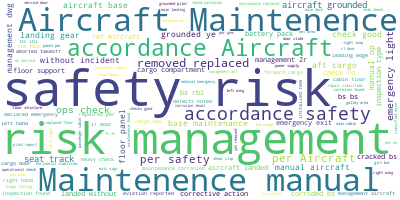

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(aid_sdr_eon_topic['Remarks'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = aid_sdr_eon_topic.Remarks.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['pilot', 'obtained', 'local', 'automated', 'weather', 'report', 'ict', 'wichita', 'dwight', 'eisenhower', 'airport', 'wichita', 'ks', 'prior', 'takeoff', 'indicating', 'clear', 'skies', 'light', 'variable', 'winds', 'temperature', 'eck', 'field', 'windsock', 'indicated', 'winds', 'mph', 'sse', 'pilot']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 6), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 2), (29, 1)]


In [ ]:
from pprint import pprint
import random

random.seed(10)
# number of topics
num_topics = 40
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(38,
  '0.051*"notified" + 0.047*"tc" + 0.039*"nbsp" + 0.033*"medical" + '
  '0.028*"mddr" + 0.028*"apu" + 0.023*"iah" + 0.021*"br" + 0.020*"mel" + '
  '0.020*"dal"'),
 (35,
  '0.066*"reo" + 0.057*"clock" + 0.052*"fs" + 0.045*"ref" + 0.029*"card" + '
  '0.028*"accordance" + 0.027*"stiffener" + 0.026*"repair" + '
  '0.025*"bombardier" + 0.021*"rev"'),
 (19,
  '0.084*"aircraft" + 0.062*"manual" + 0.062*"maintenence" + '
  '0.050*"accordance" + 0.044*"dfw" + 0.029*"removed" + 0.027*"ops" + '
  '0.024*"replaced" + 0.018*"good" + 0.017*"check"'),
 (17,
  '0.129*"light" + 0.099*"emergency" + 0.053*"inop" + 0.039*"aircraft" + '
  '0.031*"pack" + 0.031*"battery" + 0.030*"manual" + 0.029*"maintenence" + '
  '0.029*"exit" + 0.024*"lights"'),
 (8,
  '0.035*"aircraft" + 0.033*"ops" + 0.033*"manual" + 0.031*"test" + '
  '0.031*"maintenence" + 0.030*"performed" + 0.027*"accordance" + '
  '0.025*"check" + 0.024*"ord" + 0.022*"wl"'),
 (20,
  '0.063*"uas" + 0.047*"damage" + 0.046*"den" + 0.035*"struck

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.7MB 8.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=0117180fe0ef2940a9790f82a0febacf0f165f0a5d4cb864fe1c0682c225f9a1
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


Sample code

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [ ]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [ ]:
import random
text_data = []
with open('aid_sdr_eon_topic_final.csv') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

['aid,20190921023449i,2019', '21,cessna', '172rg,9770b,"gear', 'landing', 'runway', 'injury', 'propeller', 'strike']
['aid,20190103000089a,2019', '03,robins', 'ii,4246z,"while', 'manuvering', 'aircraft', 'coyote', 'trail', 'approximately', 'ground', 'pilot', 'property', 'pilot', 'strike', 'quarter', 'power', 'rotor', 'land', 'unevenfully']
['aid,20190305000619i,2019', '05,cessna', '750,902up,"march', 'civil', 'aircraft', 'n902up', 'cessna', 'citation', 'model', 'ce-750', 'serial', 'number', 'encounter', 'strike', 'rotation', 'departure', 'miami', 'international', 'airport', 'aircraft', 'operate', 'aviation', 'strike', 'pilot', 'window', 'aircraft', 'return', 'without', 'incident', 'passenger', 'member', 'board', 'aircraft', 'injury', 'sustain', 'passenger', 'return', 'fix', 'operator', 'miami', 'airport', 'operations', 'locate', 'provide', 'picture', 'identify', 'vulture', 'approximately', 'damage', 'aircraft', 'discover']
['aid,20190328002099a,2019', '28,piper', 'pa-28', '140,6412w,"o

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)


In [ ]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [ ]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [ ]:
import pyLDAvis.gensim

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


**Visualizing 15 topics:**

In [ ]:
import gensim
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

NUM_TOPICS = 15
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model15.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.042*"support" + 0.032*"corrode" + 0.031*"intercostal" + 0.023*"floor"')
(1, '0.021*"check" + 0.014*"report" + 0.012*"damage" + 0.010*"found"')
(2, '0.024*"landing" + 0.022*"aircraft" + 0.021*"pilot" + 0.019*"runway"')
(3, '0.036*"light" + 0.035*"emergency" + 0.030*"repair" + 0.026*"battery"')
(4, '0.021*"floor" + 0.017*"panel" + 0.015*"check" + 0.014*"replace"')
(5, '0.015*"flight" + 0.011*"check" + 0.011*"message" + 0.010*"replace"')
(6, '0.026*"land" + 0.026*"floor" + 0.022*"without" + 0.022*"incident"')
(7, '0.026*"aircraft" + 0.019*"engine" + 0.012*"pilot" + 0.010*"right"')
(8, '0.021*"replace" + 0.019*"light" + 0.015*"emergency" + 0.015*"remove"')
(9, '0.022*"replace" + 0.020*"maintenance" + 0.016*"aircraft" + 0.014*"found"')
(10, '0.010*"replace" + 0.010*"repair" + 0.007*"corrode" + 0.006*"inspection"')
(11, '0.016*"repair" + 0.014*"remove" + 0.013*"slide" + 0.013*"angle"')
(12, '0.032*"corrosion" + 0.019*"outboard" + 0.018*"repair" + 0.017*"track"')
(13, '0.024*"check" + 

In [ ]:
lda15 = gensim.models.ldamodel.LdaModel.load('model15.gensim')
lda_display15 = pyLDAvis.gensim.prepare(lda15, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display15)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


**Visualizing 3 topics:**

In [ ]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.017*"floor" + 0.016*"repair" + 0.016*"replace" + 0.014*"corrosion"')
(1, '0.021*"light" + 0.020*"emergency" + 0.015*"check" + 0.014*"aircraft"')
(2, '0.016*"repair" + 0.011*"crack" + 0.010*"aircraft" + 0.008*"corrode"')


In [ ]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
lda3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')
lda_display3 = pyLDAvis.gensim.prepare(lda3, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display3)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


**Visualizing** **10** **topics**:

In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

(0, '0.034*"light" + 0.032*"emergency" + 0.029*"check" + 0.020*"battery"')
(1, '0.015*"pilot" + 0.012*"engine" + 0.011*"aircraft" + 0.010*"runway"')
(2, '0.028*"aircraft" + 0.016*"replace" + 0.016*"check" + 0.009*"maintenance"')
(3, '0.011*"corrode" + 0.010*"repair" + 0.010*"crack" + 0.009*"inspection"')
(4, '0.041*"repair" + 0.022*"support" + 0.020*"crack" + 0.017*"angle"')
(5, '0.018*"aircraft" + 0.012*"maintenance" + 0.011*"replace" + 0.010*"report"')
(6, '0.020*"replace" + 0.017*"corrosion" + 0.016*"track" + 0.015*"floor"')
(7, '0.012*"pilot" + 0.010*"aircraft" + 0.009*"replace" + 0.009*"damage"')
(8, '0.023*"emergency" + 0.020*"land" + 0.018*"aircraft" + 0.016*"incident"')
(9, '0.017*"aircraft" + 0.015*"repair" + 0.014*"engine" + 0.012*"landing"')


/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


**Visualizing 40 topics:**

In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 40, id2word=dictionary, passes=15)
ldamodel.save('model40.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

(37, '0.029*"replace" + 0.025*"maintenance" + 0.025*"hinge" + 0.025*"aircraft"')
(21, '0.029*"check" + 0.019*"pilot" + 0.017*"slide" + 0.016*"found"')
(29, '0.019*"check" + 0.016*"gearbox" + 0.013*"aircraft" + 0.013*"ground"')
(26, '0.030*"outboard" + 0.028*"repair" + 0.027*"corrosion" + 0.024*"hinge"')
(18, '0.019*"accomplish" + 0.013*"damage" + 0.011*"aircraft" + 0.010*"replace"')
(19, '0.065*"land" + 0.060*"incident" + 0.055*"without" + 0.043*"emergency"')
(17, '0.015*"check" + 0.014*"corrosion" + 0.012*"repair" + 0.012*"aal1412"')
(23, '0.028*"pilot" + 0.018*"aircraft" + 0.018*"landing" + 0.016*"report"')
(10, '0.023*"landing" + 0.012*"crack" + 0.012*"lower" + 0.012*"inspection"')
(11, '0.030*"aircraft" + 0.019*"engine" + 0.017*"start" + 0.013*"power"')
(13, '0.017*"crack" + 0.016*"cabin" + 0.014*"stiffener" + 0.013*"repair"')
(35, '0.013*"pilot" + 0.011*"angle" + 0.010*"aircraft" + 0.010*"triple"')
(6, '0.015*"corrosion" + 0.015*"check" + 0.012*"repair" + 0.011*"perform"')
(0, '0.

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
lda40 = gensim.models.ldamodel.LdaModel.load('model40.gensim')
lda_display40 = pyLDAvis.gensim.prepare(lda40, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display40)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


**LSA**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

#documents = ["doc1.txt", "doc2.txt", "doc3.txt"] 
  
# raw documents to tf-idf matrix: 

vectorizer = TfidfVectorizer(stop_words='english', 
                             use_idf=True, 
                             smooth_idf=True)

# SVD to reduce dimensionality: 

svd_model = TruncatedSVD(n_components=100,  
                         algorithm='randomized',
                         n_iter=10)

# pipeline of tf-idf + SVD, fit to and applied to documents:

svd_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])

svd_matrix = svd_transformer.fit_transform(aid_sdr_eon_topic['Remarks'])

# svd_matrix can later be used to compare documents, compare words, or compare queries with documents

In [ ]:
svd_matrix


array([[ 7.33622428e-02,  8.01352028e-02, -7.28940951e-02, ...,
         1.82781037e-03,  1.32042006e-02, -1.61876735e-02],
       [ 7.21306600e-02,  6.53456767e-02, -7.50108900e-02, ...,
        -2.92248019e-02,  2.18588005e-02,  4.22356102e-03],
       [ 5.89495080e-02,  3.91496887e-02, -4.02879858e-02, ...,
        -2.00142184e-02,  1.59719010e-02,  9.42222154e-03],
       ...,
       [ 1.49623513e-02,  1.60916911e-02, -3.89158138e-02, ...,
         7.34530910e-03,  1.88830338e-02, -1.69817016e-04],
       [ 3.62036348e-02,  4.19798412e-02, -5.33475994e-02, ...,
         4.53795149e-05,  1.79891951e-02, -1.78005629e-02],
       [ 3.50768970e-03,  4.54930594e-04, -3.67410815e-03, ...,
        -3.62012820e-04,  4.48398593e-03, -2.54149935e-03]])

In [ ]:
from gensim.corpora import Dictionary
dictionary = corpora.Dictionary(text_data)
from gensim.corpora.Dictionary import load_from_text, doc2bow
from gensim.corpora import MmCorpus
from gensim.models.ldamodel import LdaModel

#document = "This is some document..."

# load id->word mapping (the dictionary)
id2word = load_from_text('wiki_en_wordids.txt')

# load corpus iterator
mm = MmCorpus('wiki_en_tfidf.mm')

# extract 100 LDA topics, updating once every 10,000
lda = LdaModel(corpus=mm, id2word=id2word, num_topics=100, update_every=1, chunksize=10000, passes=1)

# use LDA model: transform new doc to bag-of-words, then apply lda
doc_bow = doc2bow(aid_sdr_eon_topic['Remarks'].split())
doc_lda = lda[doc_bow]

# doc_lda is vector of length num_topics representing weighted presence of each topic in the doc

ModuleNotFoundError: ignored

In [ ]:
#Topic modeling with Ngrams


In [ ]:
import re
import numpy as np
import pandas as  pd
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))            #deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

In [ ]:
# Define function for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

In [ ]:
# Create Dictionary 
id2word = corpora.Dictionary(data_lemmatized)  
# Create Corpus 
texts = data_lemmatized  
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]  
# View 
print(corpus[:1])

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis